#### Google Colab Setup

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

PROJECT_PATH = 'Colab Notebooks/CW_Folder_PG'
GOOGLE_DRIVE_PATH = os.path.join('drive', 'My Drive', PROJECT_PATH)

#### Setting Environment, Installing packages

In [ ]:
LIB_PATH = f"{GOOGLE_DRIVE_PATH}/requirements.txt"
!pip install -r "{LIB_PATH}"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 10.8 MB/s eta 0:00:00


#### Import tools and functions

In [ ]:
%run "{GOOGLE_DRIVE_PATH}/Code/Tools.ipynb"
%run "{GOOGLE_DRIVE_PATH}/Code/Models.ipynb"

<ipython-input-4-6f9cfd3bdf37>:61: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner import HyperModel, RandomSearch


time: 320 ms (started: 2024-04-20 23:13:53 +00:00)


### Data Exploration

#### Class distribution

In [ ]:
# Import train and test set
X_train, y_train = _import_data('train')
X_test, y_test = _import_data('test')

time: 2.74 s (started: 2024-04-20 23:14:29 +00:00)


In [ ]:
print(Counter(y_train))

Counter({1: 1940, 0: 376, 2: 78})
time: 1.54 ms (started: 2024-04-20 23:14:32 +00:00)


In [ ]:
print(Counter(y_test))

Counter({1: 388, 0: 51, 2: 19})
time: 477 µs (started: 2024-04-20 23:14:32 +00:00)


> This indicates data inbalanced in both train and test set, with over 80% of total records belong to class 1.



#### Data Size

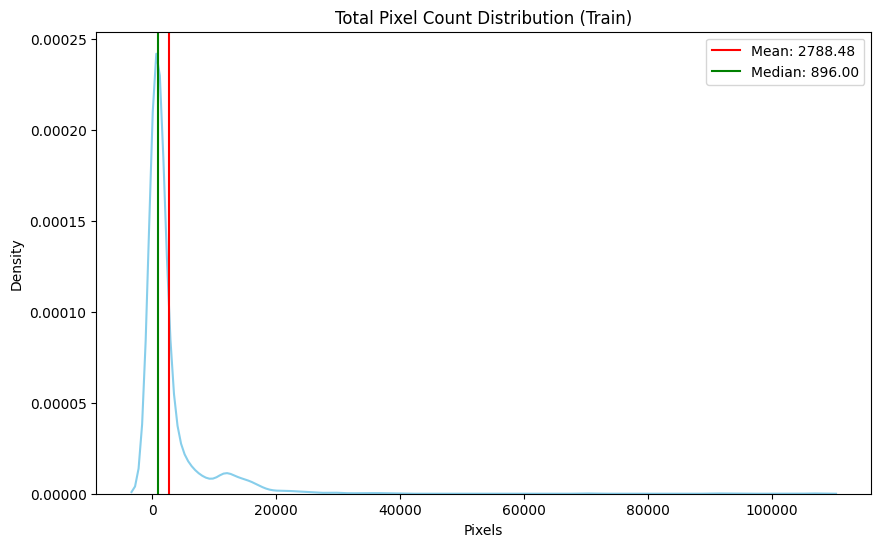

time: 365 ms (started: 2024-04-20 23:14:34 +00:00)


In [ ]:
# Get total pixels of each image within train set by multiplying width and height
pixel_counts = np.array([image.shape[0] * image.shape[1] for image in X_train])

# Calculate mean and median
mean_value = np.mean(pixel_counts)
median_value = np.median(pixel_counts)

plt.figure(figsize=(10, 6))

# Plot kernel density estimation
sns.kdeplot(pixel_counts, color='skyblue')

# Show mean and median as vertical lines
plt.axvline(mean_value, color='r', linestyle='-', label=f'Mean: {mean_value:.2f}')
plt.axvline(median_value, color='g', linestyle='-', label=f'Median: {median_value:.2f}')

# Set title and labels
plt.title('Total Pixel Count Distribution (Train)')
plt.xlabel('Pixels')
plt.ylabel('Density')

# Add legend
plt.legend()

# Show plot
plt.show()

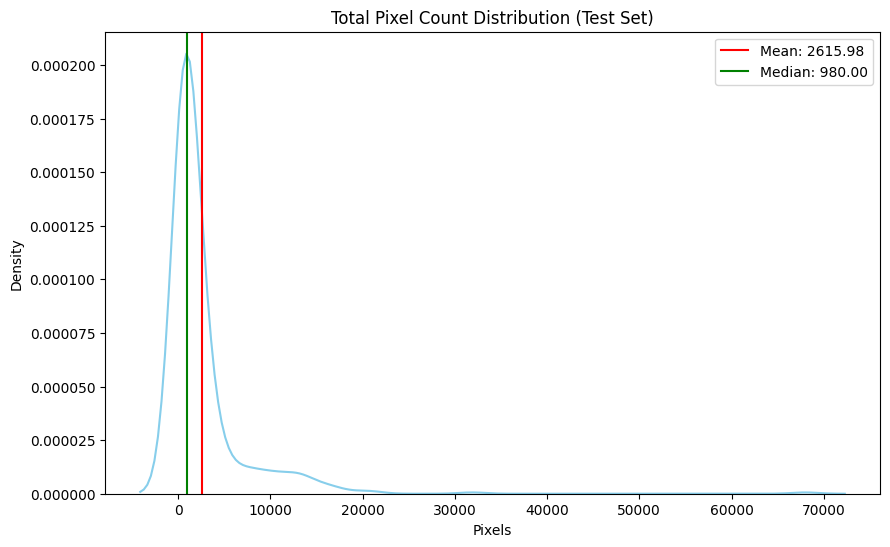

time: 345 ms (started: 2024-04-20 23:14:34 +00:00)


In [ ]:
# Get total pixels of each image within test set by multiplying width and height
pixel_counts = np.array([image.shape[0] * image.shape[1] for image in X_test])

# Calculate mean and median
mean_value = np.mean(pixel_counts)
median_value = np.median(pixel_counts)

plt.figure(figsize=(10, 6))

# Plot kernel density estimation
sns.kdeplot(pixel_counts, color='skyblue')

# Show mean and median as vertical lines
plt.axvline(mean_value, color='r', linestyle='-', label=f'Mean: {mean_value:.2f}')
plt.axvline(median_value, color='g', linestyle='-', label=f'Median: {median_value:.2f}')

# Set title and labels
plt.title('Total Pixel Count Distribution (Test Set)')
plt.xlabel('Pixels')
plt.ylabel('Density')

# Add legend
plt.legend()

# Show plot
plt.show()

> This indicates that both train and test set have simalar distribution  of image size, with the mean around 3,000 total pixel. Then, resize to 64 should be reasonable.

#### Data Augmentation

In [ ]:
# Resize to 64
X_train = _resize(X_train, (64,64))

# Convert data to array
X_train, y_train = _convert_to_array(X_train, y_train)

# Convert to float datatype
X_train = _convert_to_float(X_train)

# Perform data augmentation
X_train, y_train = _gen_augmented_data(X_train, y_train)

time: 3.02 s (started: 2024-04-20 23:14:51 +00:00)


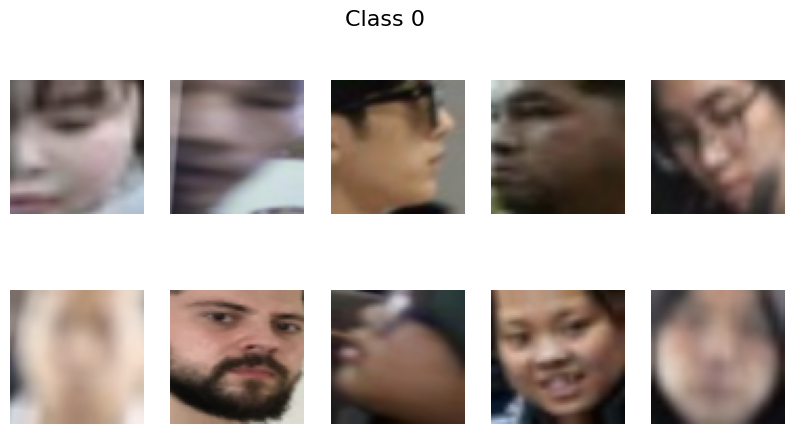

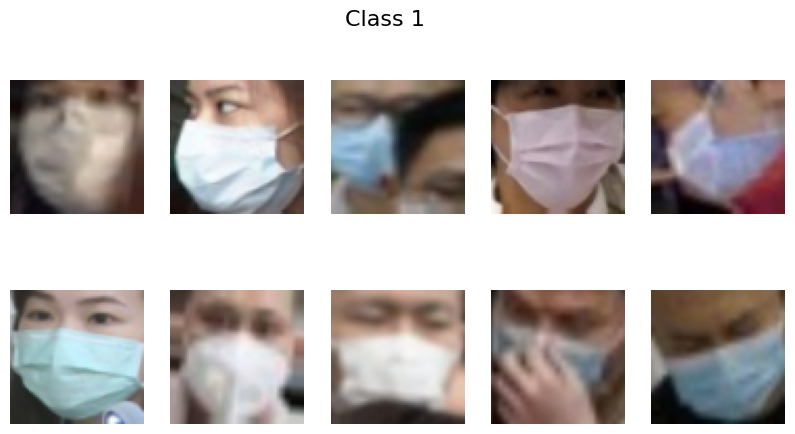

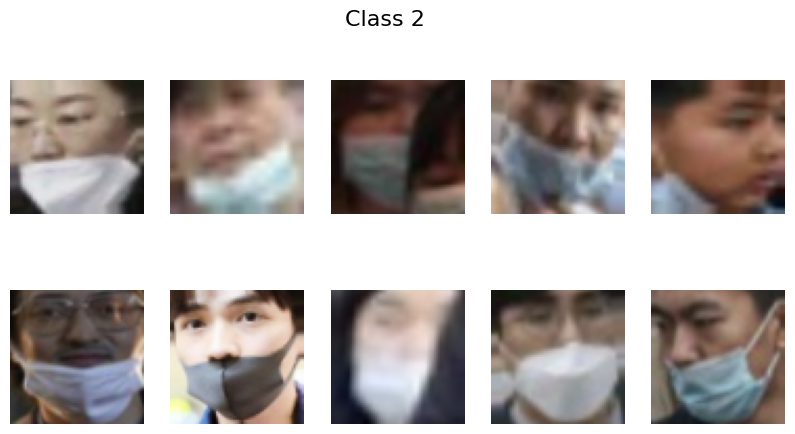

time: 1.43 s (started: 2024-04-20 23:14:54 +00:00)


In [ ]:
# Distinct classes
classes_to_plot = [0, 1, 2]

# Plot 10 images per class
num_images_to_plot = 10

# Get index of each class
for class_label in classes_to_plot:
    indices = [i for i, label in enumerate(y_train) if label == class_label]

    # Get array of image value
    images_to_plot = X_train[indices[:num_images_to_plot]]

    plt.figure(figsize=(10, 5))

    # Add title
    plt.suptitle(f'Class {class_label}', fontsize=16)

    # Plot 10 images
    for i in range(num_images_to_plot):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images_to_plot[i], cmap='gray')
        plt.axis('off')

    plt.show()

#### Histogram Equalization

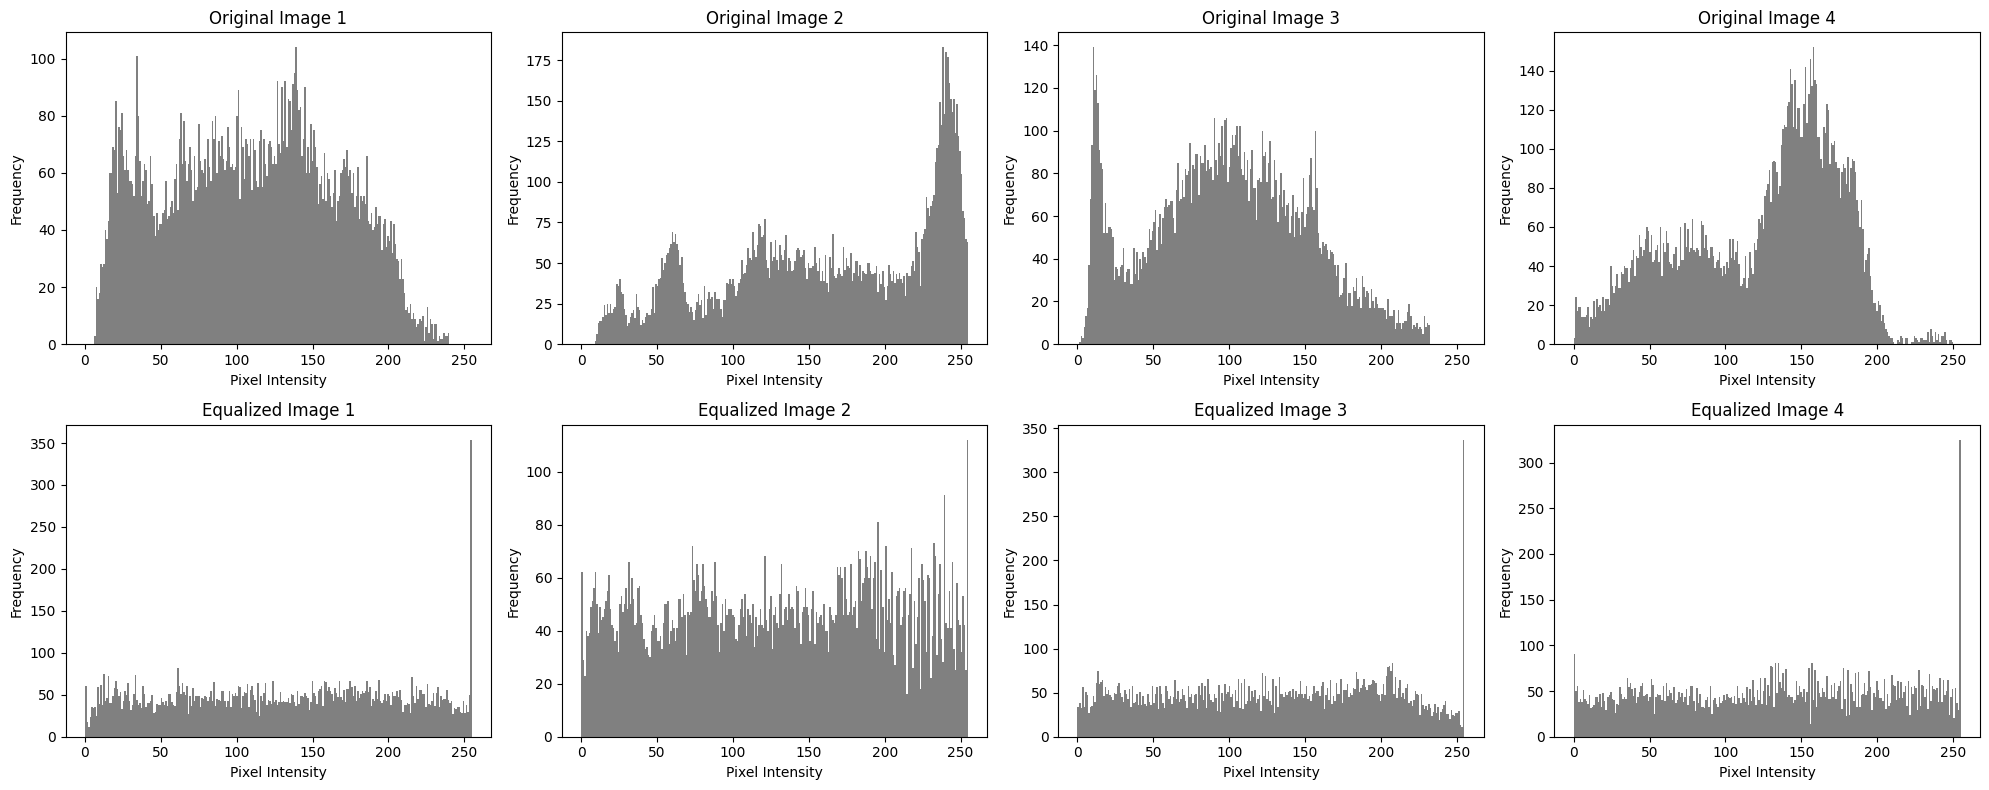

time: 4.4 s (started: 2024-04-16 19:02:19 +00:00)


In [ ]:
# Create subplots
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
axes = axes.flatten()

# Filter 4 images
X_filter = X_train[:4]

# Apply equilized histogram
X_eq = _equalizehist(X_filter)

# Plot histograms for original images
for i, image in enumerate(X_filter):
    axes[i].hist(image.flatten(), bins=256, range=(0, 255), color='gray')
    axes[i].set_title(f'Original Image {i+1}')
    axes[i].set_xlabel('Pixel Intensity')
    axes[i].set_ylabel('Frequency')

# Plot histograms for equalized images
for i, image in enumerate(X_eq):
    axes[i+4].hist(image.flatten(), bins=256, range=(0, 255), color='gray')
    axes[i+4].set_title(f'Equalized Image {i+1}')
    axes[i+4].set_xlabel('Pixel Intensity')
    axes[i+4].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

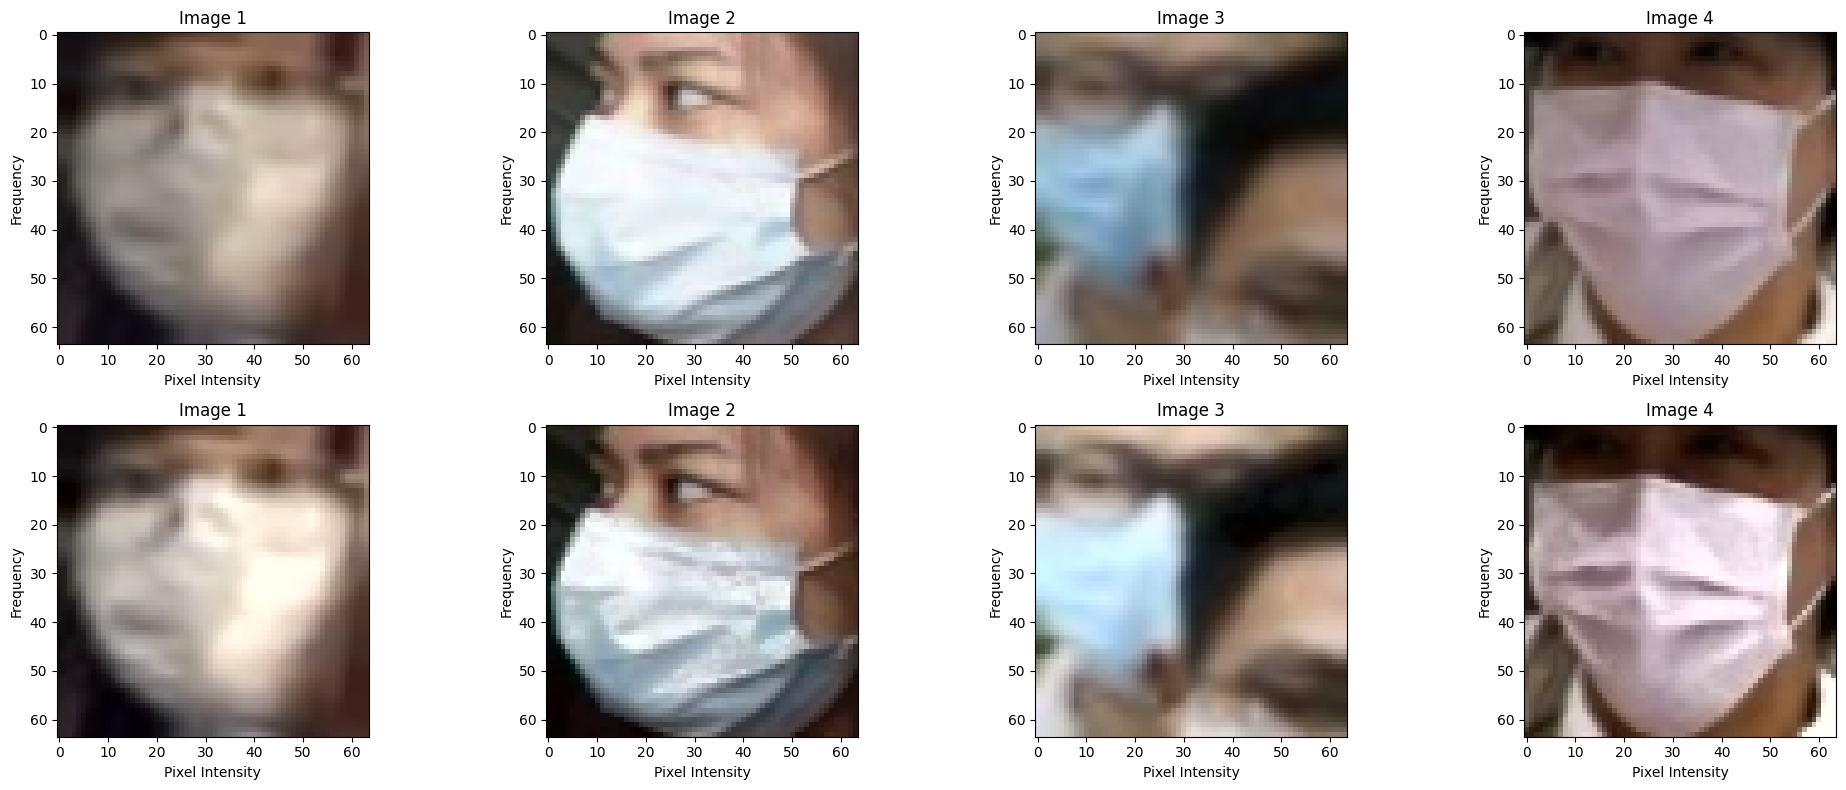

time: 1.58 s (started: 2024-04-16 19:07:56 +00:00)


In [ ]:
# Create subplots
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
axes = axes.flatten()

# Plot original images
for i, image in enumerate(X_filter):
    axes[i].imshow(image, cmap='gray')
    axes[i].set_title(f'Image {i+1}')
    axes[i].set_xlabel('Pixel Intensity')
    axes[i].set_ylabel('Frequency')

# Plot equalized images
for i, image in enumerate(X_eq):
    axes[i+4].imshow(image, cmap='gray')
    axes[i+4].set_title(f'Image {i+1}')
    axes[i+4].set_xlabel('Pixel Intensity')
    axes[i+4].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

#### ESRGAN

In [ ]:
X_train, X_validate, y_train, y_validate = _get_data('train', split_size=0.2)

X_hr = _esrgan(X_train)

time: 9min 48s (started: 2024-04-19 00:41:25 +00:00)


In [ ]:
# # Load super-resolution images to drive

# with open(f'esrgan_train_imgs.pkl', 'wb') as f:
#     pickle.dump({'X': X_hr, 'y': y_train}, f)

# with zipfile.ZipFile(f'{GOOGLE_DRIVE_PATH}/CW_Dataset/esrgan_train_imgs.zip', 'w') as zipf:
#     zipf.write('esrgan_train_imgs.pkl')

time: 326 µs (started: 2024-04-19 00:52:32 +00:00)


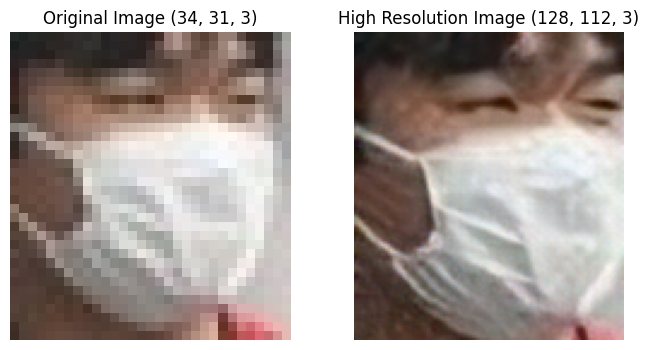

time: 1.32 s (started: 2024-04-19 00:51:14 +00:00)


In [ ]:
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(X_train[0])
plt.title(f'Original Image {X_train[0].shape}')
plt.axis('off')

# Plot the high resolution image
plt.subplot(1, 2, 2)
plt.imshow(X_hr[0])
plt.title(f'High Resolution Image {X_hr[0].shape}')
plt.axis('off')

plt.show()

### **SVM - HOG**


> Based on experimentation, SVM with HOG without balancing and augmentation demonstrates the highest accuracy among other the application of data preprocessing.

In [ ]:
# Parameter tuning using gridsearch on stratify 5-folds cross validation
C = [0.1, 1, 10, 100, 1000]
gamma = [0.0001, 0.001, 0.01, 0.1, 1, 10]
degree = [2, 3, 4]

params= [
    {'kernel': ['linear'], 'C': C},
    {'kernel': ['poly'], 'C': C, 'degree': degree},
    {'kernel': ['rbf', 'sigmoid'], 'C': C, 'gamma': gamma}
]

time: 679 µs (started: 2024-04-20 23:15:15 +00:00)


In [ ]:
# A function for entire training pipeline for SVM with hog feature descriptor
# SVMWithHOG(parameters grid, Apply data augmentation , Apply balancing)

SVMWithHOG(params, augmentation=False, balancing=False)._main()

Fitting 5 folds for each of 80 candidates, totalling 400 fits
Best params : {'C': 1, 'degree': 2, 'kernel': 'poly'}
Best scores : 0.7103976976849633
Model saved to 20240404-233425
Accuracy: 0.993733681462141
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       301
           1       1.00      0.99      1.00      1552
           2       1.00      1.00      1.00        62

    accuracy                           0.99      1915
   macro avg       0.99      1.00      0.99      1915
weighted avg       0.99      0.99      0.99      1915

Accuracy: 0.8684759916492694
              precision    recall  f1-score   support

           0       0.67      0.67      0.67        75
           1       0.91      0.93      0.92       388
           2       0.50      0.25      0.33        16

    accuracy                           0.87       479
   macro avg       0.69      0.62      0.64       479
weighted avg       0.86      0.87      0.86       479

t

#### Training with different preprocessing

In [ ]:
# A function for entire training pipeline for SVM with hog feature descriptor
# SVMWithHOG(parameters grid, Apply data augmentation , Apply balancing)

SVMWithHOG(params, augmentation=True, balancing=False)._main()

Fitting 5 folds for each of 80 candidates, totalling 400 fits
Best params : {'C': 0.1, 'degree': 3, 'kernel': 'poly'}
Best scores : 0.6701479210172365
Model saved to 20240404-235954
Accuracy: 0.9483028720626632
              precision    recall  f1-score   support

           0       0.76      1.00      0.86       301
           1       1.00      0.94      0.97      1552
           2       0.93      1.00      0.96        62

    accuracy                           0.95      1915
   macro avg       0.90      0.98      0.93      1915
weighted avg       0.96      0.95      0.95      1915

Accuracy: 0.860125260960334
              precision    recall  f1-score   support

           0       0.58      0.79      0.67        75
           1       0.94      0.90      0.92       388
           2       0.43      0.19      0.26        16

    accuracy                           0.86       479
   macro avg       0.65      0.63      0.62       479
weighted avg       0.87      0.86      0.86       479


In [ ]:
# A function for entire training pipeline for SVM with hog feature descriptor
# SVMWithHOG(parameters grid, Apply data augmentation , Apply balancing)

SVMWithHOG(params, augmentation=False, balancing=_randomoversampler)._main()

Fitting 5 folds for each of 80 candidates, totalling 400 fits
Best params : {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best scores : 0.9445885347624475
Model saved to 20240404-235201
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       500
           1       1.00      1.00      1.00       500
           2       1.00      1.00      1.00       500

    accuracy                           1.00      1500
   macro avg       1.00      1.00      1.00      1500
weighted avg       1.00      1.00      1.00      1500

Accuracy: 0.860125260960334
              precision    recall  f1-score   support

           0       0.60      0.73      0.66        75
           1       0.92      0.92      0.92       388
           2       0.00      0.00      0.00        16

    accuracy                           0.86       479
   macro avg       0.51      0.55      0.53       479
weighted avg       0.84      0.86      0.85       479

time: 7min 52s 

In [ ]:
# A function for entire training pipeline for SVM with hog feature descriptor
# SVMWithHOG(parameters grid, Apply data augmentation , Apply balancing)

SVMWithHOG(params, augmentation=True, balancing=_randomoversampler)._main()

Fitting 5 folds for each of 80 candidates, totalling 400 fits
Best params : {'C': 1, 'degree': 4, 'kernel': 'poly'}
Best scores : 0.9028401493692012
Model saved to 20240408-141544
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       500
           1       1.00      1.00      1.00       500
           2       1.00      1.00      1.00       500

    accuracy                           1.00      1500
   macro avg       1.00      1.00      1.00      1500
weighted avg       1.00      1.00      1.00      1500

Accuracy: 0.8455114822546973
              precision    recall  f1-score   support

           0       0.54      0.83      0.66        75
           1       0.97      0.87      0.91       388
           2       0.38      0.38      0.38        16

    accuracy                           0.85       479
   macro avg       0.63      0.69      0.65       479
weighted avg       0.88      0.85      0.86       479

time: 9min 6s (

### **SVM - SIFT**

> Based on experimentation, SVM with SIFT without blancing and augmentation demonstrates the highest acuuracy among other the application of data preprocessing.

In [ ]:
# Parameter tuning using gridsearch on stratify 5-folds cross validation

C = [0.1, 1, 10, 100, 1000]
gamma = [0.0001, 0.001, 0.01, 0.1, 1, 10]
degree = [2, 3, 4]

params= [
    {'kernel': ['linear'], 'C': C},
    {'kernel': ['poly'], 'C': C, 'degree': degree},
    {'kernel': ['rbf', 'sigmoid'], 'C': C, 'gamma': gamma}
]

time: 989 µs (started: 2024-04-04 23:08:26 +00:00)


In [ ]:
# A function for entire training pipeline for SVM with sift feature descriptor
# SVMWithSIFT(parameters grid, Apply data augmentation , Apply balancing)

SVMWithSIFT(params, augmentation=False, balancing=False)._main()

Fitting 5 folds for each of 80 candidates, totalling 400 fits
Best params : {'C': 100, 'gamma': 1, 'kernel': 'rbf'}
Best scores : 0.4511959164104645
Model saved to 20240404-231342
Accuracy: 0.739425587467363
              precision    recall  f1-score   support

           0       0.50      0.86      0.63       301
           1       0.98      0.71      0.82      1552
           2       0.22      0.98      0.36        62

    accuracy                           0.74      1915
   macro avg       0.57      0.85      0.60      1915
weighted avg       0.88      0.74      0.78      1915

Accuracy: 0.6680584551148225
              precision    recall  f1-score   support

           0       0.36      0.73      0.49        75
           1       0.95      0.67      0.78       388
           2       0.11      0.38      0.17        16

    accuracy                           0.67       479
   macro avg       0.47      0.59      0.48       479
weighted avg       0.83      0.67      0.72       479

t

#### Training with different preprocessing

In [ ]:
# A function for entire training pipeline for SVM with sift feature descriptor
# SVMWithSIFT(parameters grid, Apply data augmentation , Apply balancing)

SVMWithSIFT(params, augmentation=False, balancing=_randomoversampler)._main()

Fitting 5 folds for each of 80 candidates, totalling 400 fits
Best params : {'C': 100, 'gamma': 10, 'kernel': 'rbf'}
Best scores : 0.8682889186666888
Model saved to 20240404-231908
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       500
           1       1.00      1.00      1.00       500
           2       1.00      1.00      1.00       500

    accuracy                           1.00      1500
   macro avg       1.00      1.00      1.00      1500
weighted avg       1.00      1.00      1.00      1500

Accuracy: 0.6129707112970711
              precision    recall  f1-score   support

           0       0.27      0.64      0.38        74
           1       0.89      0.63      0.74       388
           2       0.06      0.12      0.08        16

    accuracy                           0.61       478
   macro avg       0.41      0.46      0.40       478
weighted avg       0.77      0.61      0.66       478

time: 57 s (st

In [ ]:
# A function for entire training pipeline for SVM with sift feature descriptor
# SVMWithSIFT(parameters grid, Apply data augmentation , Apply balancing)

SVMWithSIFT(params, augmentation=True, balancing=False)._main()

Fitting 5 folds for each of 80 candidates, totalling 400 fits
Best params : {'C': 1, 'degree': 3, 'kernel': 'poly'}
Best scores : 0.4612766337190677
Model saved to 20240404-231725
Accuracy: 0.8725848563968669
              precision    recall  f1-score   support

           0       0.63      0.95      0.76       301
           1       0.99      0.85      0.92      1552
           2       0.47      0.98      0.64        62

    accuracy                           0.87      1915
   macro avg       0.70      0.93      0.77      1915
weighted avg       0.92      0.87      0.88      1915

Accuracy: 0.6409185803757829
              precision    recall  f1-score   support

           0       0.28      0.52      0.37        75
           1       0.88      0.69      0.77       388
           2       0.03      0.06      0.04        16

    accuracy                           0.64       479
   macro avg       0.40      0.42      0.39       479
weighted avg       0.76      0.64      0.68       479



In [ ]:
# A function for entire training pipeline for SVM with sift feature descriptor
# SVMWithSIFT(parameters grid, Apply data augmentation , Apply balancing)

SVMWithSIFT(params, augmentation=True, balancing=_randomoversampler)._main()

Fitting 5 folds for each of 80 candidates, totalling 400 fits
Best params : {'C': 1, 'degree': 4, 'kernel': 'poly'}
Best scores : 0.6944073786616611
Model saved to 20240408-143005
Accuracy: 0.9506666666666667
              precision    recall  f1-score   support

           0       0.93      0.98      0.96       500
           1       0.98      0.89      0.94       500
           2       0.94      0.98      0.96       500

    accuracy                           0.95      1500
   macro avg       0.95      0.95      0.95      1500
weighted avg       0.95      0.95      0.95      1500

Accuracy: 0.524008350730689
              precision    recall  f1-score   support

           0       0.27      0.63      0.37        75
           1       0.91      0.51      0.65       388
           2       0.09      0.50      0.16        16

    accuracy                           0.52       479
   macro avg       0.42      0.54      0.39       479
weighted avg       0.78      0.52      0.59       479

t

### **CNN - Custom**

> Based on experimentation, CNN with augmentation demonstrates the highest accuracy among other the application of data preprocessing.

In [ ]:
# Parameter tuning using randomsearch with cross-validation

param_grid = {
    'model__learning_rate': np.logspace(-3, -2, num=2),
    'model__dense_units': [64, 128, 256],
    'model__dropout_rates': np.linspace(0.1, 0.3, num=3),
    'model__weight_decay': np.logspace(-4, -3, num=2)
}

time: 983 µs (started: 2024-04-20 23:16:27 +00:00)


Model saved to drive/My Drive/Colab Notebooks/Computer Vision/Project/CW_Folder_PG/Models/Custom-CNN/20240409-183732.h5
Fitting 5 folds for each of 10 candidates, totalling 50 fits
60/60 [==============================] - 2s 8ms/step - loss: 0.4740 - accuracy: 0.8381 - lr: 0.0010
Best Estimator Parameters: {'model': None, 'build_fn': <function customCNN._create_keras_classifier.<locals>._create_cnn_model at 0x7c077458dbd0>, 'warm_start': False, 'random_state': None, 'optimizer': 'rmsprop', 'loss': None, 'metrics': None, 'batch_size': None, 'validation_batch_size': None, 'verbose': 1, 'callbacks': [<keras.src.callbacks.ModelCheckpoint object at 0x7c07753c3d00>, <keras.src.callbacks.EarlyStopping object at 0x7c07755f72e0>, <keras.src.callbacks.ReduceLROnPlateau object at 0x7c07755f75b0>], 'validation_split': 0.0, 'shuffle': True, 'run_eagerly': False, 'epochs': 1, 'model__weight_decay': 0.01, 'model__optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'model__learning_rate': 0.001, 'mo

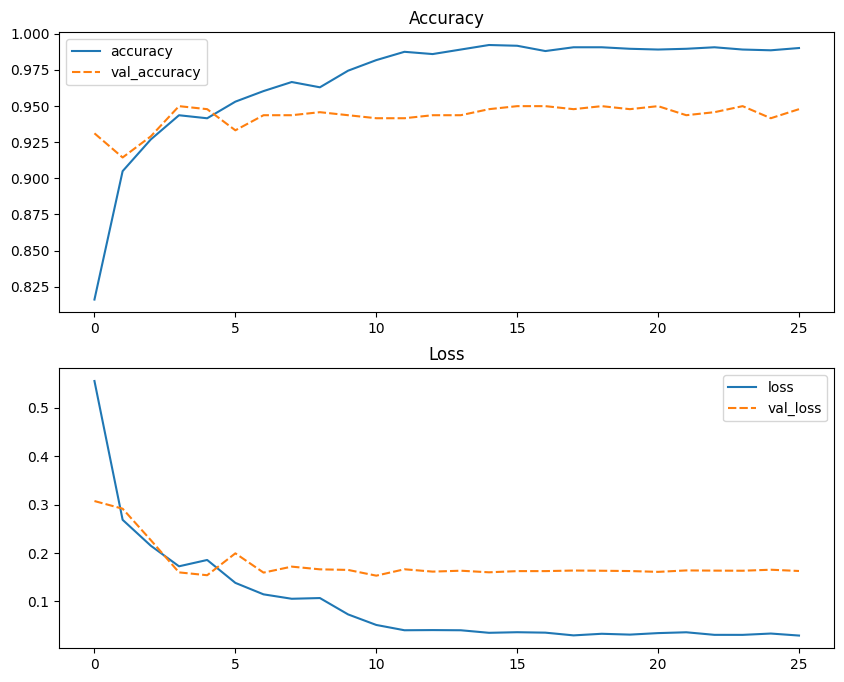

time: 2min 33s (started: 2024-04-09 18:37:29 +00:00)


In [ ]:
# A function for entire training process for CNN model
# customCNN(param_grid, apply augmentation, apply class_weight, apply super resolution)

customCNN(param_grid, augmentation=True, class_weight=False, sr=False)._main()

#### Training with different preprocessing

Model saved to drive/My Drive/Colab Notebooks/Computer Vision/Project/CW_Folder_PG/Models/Custom-CNN/20240404-224420.h5
Fitting 5 folds for each of 10 candidates, totalling 50 fits
60/60 [==============================] - 2s 12ms/step - loss: 1.0310 - accuracy: 0.7838 - lr: 0.0100
Best Estimator Parameters: {'model': None, 'build_fn': <function customCNN._create_keras_classifier.<locals>._create_cnn_model at 0x79b60e14beb0>, 'warm_start': False, 'random_state': None, 'optimizer': 'rmsprop', 'loss': None, 'metrics': None, 'batch_size': None, 'validation_batch_size': None, 'verbose': 1, 'callbacks': [<keras.src.callbacks.ModelCheckpoint object at 0x79b55e3f6680>, <keras.src.callbacks.EarlyStopping object at 0x79b55e465120>, <keras.src.callbacks.ReduceLROnPlateau object at 0x79b5699ebfa0>], 'validation_split': 0.0, 'shuffle': True, 'run_eagerly': False, 'epochs': 1, 'model__weight_decay': 9.999999999999999e-05, 'model__optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'model__learning

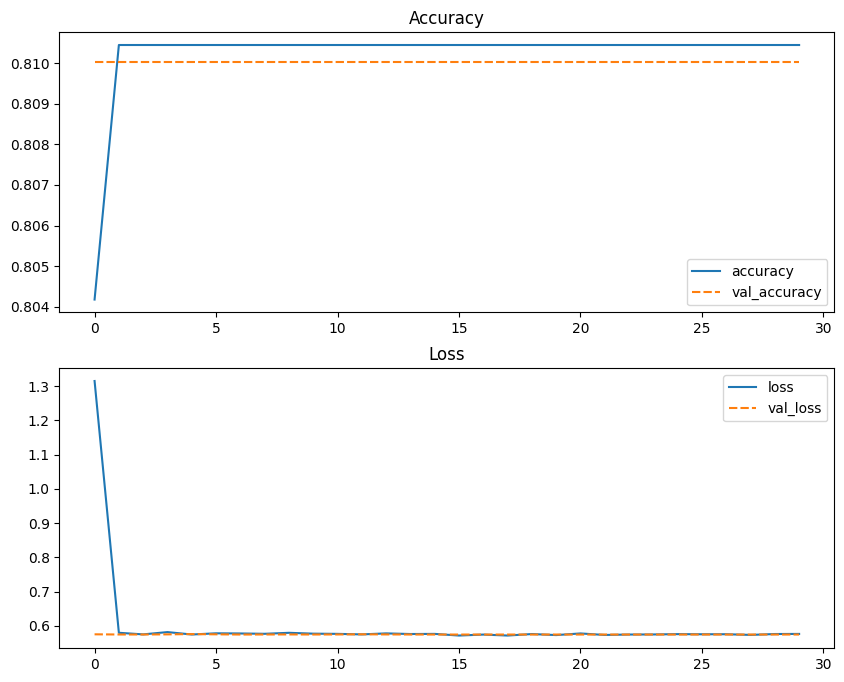

time: 2min 46s (started: 2024-04-04 22:44:17 +00:00)


In [ ]:
# A function for entire training process for CNN model
# customCNN(param_grid, apply augmentation, apply class_weight, apply super resolution)

customCNN(param_grid, augmentation=False,
          class_weight=False, sr=False)._main()

Model saved to drive/My Drive/Colab Notebooks/Computer Vision/Project/CW_Folder_PG/Models/Custom-CNN/20240404-225643.h5
Fitting 5 folds for each of 10 candidates, totalling 50 fits
60/60 [==============================] - 2s 9ms/step - loss: 1.5111 - accuracy: 0.1963 - lr: 1.0000e-04
Best Estimator Parameters: {'model': None, 'build_fn': <function customCNN._create_keras_classifier.<locals>._create_cnn_model at 0x79b606d984c0>, 'warm_start': False, 'random_state': None, 'optimizer': 'rmsprop', 'loss': None, 'metrics': None, 'batch_size': None, 'validation_batch_size': None, 'verbose': 1, 'callbacks': [<keras.src.callbacks.ModelCheckpoint object at 0x79b44ef9c280>, <keras.src.callbacks.EarlyStopping object at 0x79b44ef308e0>, <keras.src.callbacks.ReduceLROnPlateau object at 0x79b4d8e87f40>], 'validation_split': 0.0, 'shuffle': True, 'run_eagerly': False, 'epochs': 1, 'model__weight_decay': 9.999999999999999e-05, 'model__optimizer': <class 'keras.src.optimizers.sgd.SGD'>, 'model__learnin

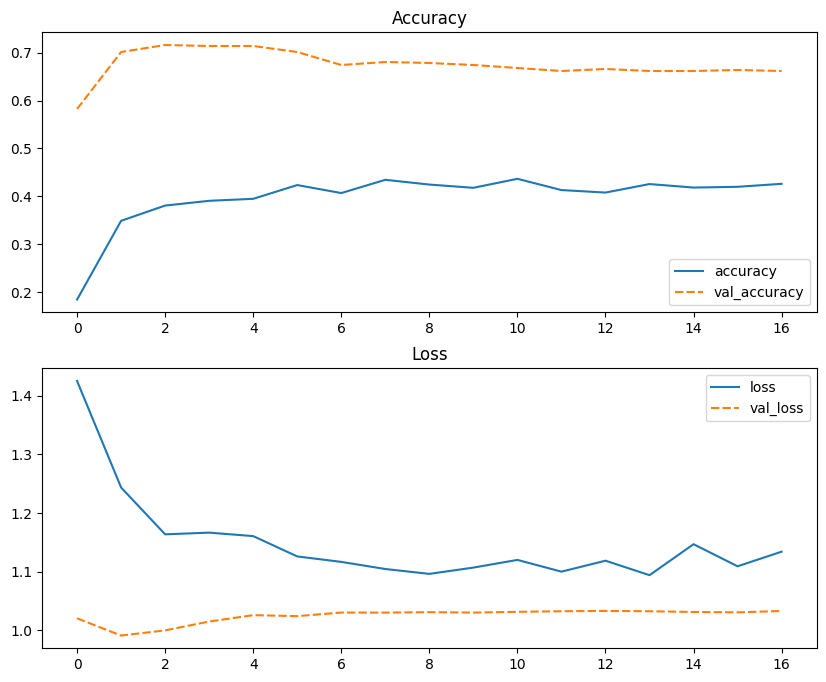

time: 2min 20s (started: 2024-04-04 22:56:42 +00:00)


In [ ]:
# A function for entire training process for CNN model
# customCNN(param_grid, apply augmentation, apply class_weight, apply super resolution)

customCNN(param_grid, augmentation=False,
          class_weight=True, sr=False)._main()

60/60 [==============================] - 0s 5ms/step
Model saved to drive/My Drive/Colab Notebooks/Computer Vision/Project/CW_Folder_PG/Models/Custom-CNN/20240404-230213.h5
Fitting 5 folds for each of 10 candidates, totalling 50 fits
60/60 [==============================] - 2s 8ms/step - loss: 0.9980 - accuracy: 0.7822 - lr: 0.0010
Best Estimator Parameters: {'model': None, 'build_fn': <function customCNN._create_keras_classifier.<locals>._create_cnn_model at 0x79b4db2d00d0>, 'warm_start': False, 'random_state': None, 'optimizer': 'rmsprop', 'loss': None, 'metrics': None, 'batch_size': None, 'validation_batch_size': None, 'verbose': 1, 'callbacks': [<keras.src.callbacks.ModelCheckpoint object at 0x79b44445caf0>, <keras.src.callbacks.EarlyStopping object at 0x79b4387b1000>, <keras.src.callbacks.ReduceLROnPlateau object at 0x79b44457a8c0>], 'validation_split': 0.0, 'shuffle': True, 'run_eagerly': False, 'epochs': 1, 'model__weight_decay': 0.09999999999999999, 'model__optimizer': <class '

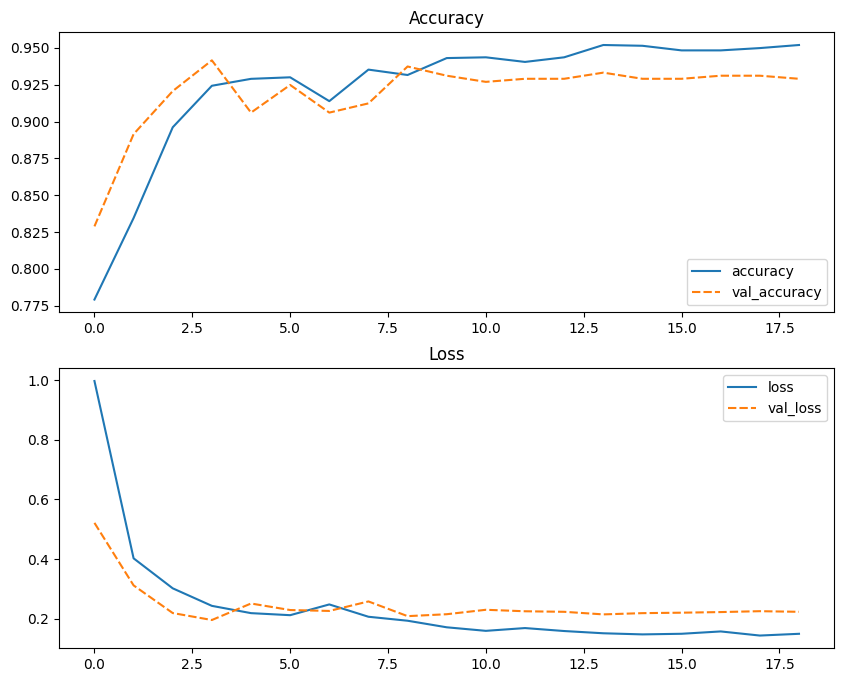

time: 2min 30s (started: 2024-04-04 23:02:10 +00:00)


In [ ]:
# A function for entire training process for CNN model
# customCNN(param_grid, apply augmentation, apply class_weight, apply super resolution)

customCNN(param_grid, augmentation=False,
          class_weight=False, sr=True)._main()

60/60 [==============================] - 0s 5ms/step
Model saved to drive/My Drive/Colab Notebooks/Computer Vision/Project/CW_Folder_PG/Models/Custom-CNN/20240404-232629.h5
Fitting 5 folds for each of 10 candidates, totalling 50 fits
60/60 [==============================] - 2s 8ms/step - loss: 0.5890 - accuracy: 0.8339 - lr: 0.0010
Best Estimator Parameters: {'model': None, 'build_fn': <function customCNN._create_keras_classifier.<locals>._create_cnn_model at 0x7c45038d0940>, 'warm_start': False, 'random_state': None, 'optimizer': 'rmsprop', 'loss': None, 'metrics': None, 'batch_size': None, 'validation_batch_size': None, 'verbose': 1, 'callbacks': [<keras.src.callbacks.ModelCheckpoint object at 0x7c45129a1990>, <keras.src.callbacks.EarlyStopping object at 0x7c45129a11b0>, <keras.src.callbacks.ReduceLROnPlateau object at 0x7c4516c2b7f0>], 'validation_split': 0.0, 'shuffle': True, 'run_eagerly': False, 'epochs': 1, 'model__weight_decay': 0.01, 'model__optimizer': <class 'keras.src.optim

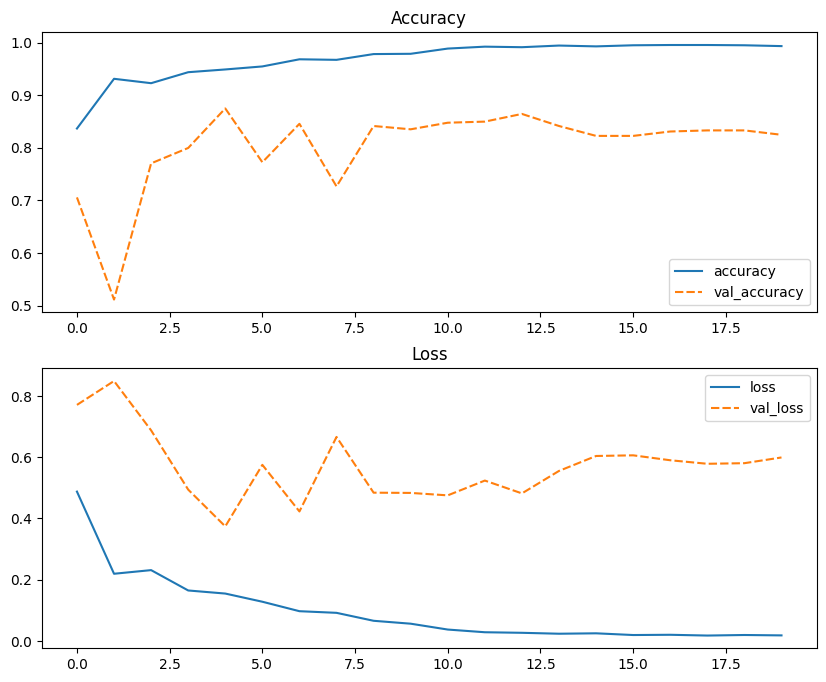

time: 2min 30s (started: 2024-04-04 23:26:24 +00:00)


In [ ]:
# A function for entire training process for CNN model
# customCNN(param_grid, apply augmentation, apply class_weight, apply super resolution)

customCNN(param_grid, augmentation=True,
          class_weight=False, sr=True)._main()

### **CNN - ResNet50**

> Based on experimentation, ResNet50 with augmentation demonstrates the highest accuracy among other the application of data preprocessing, and also highest among other models in this study.


Trial 5 Complete [00h 01m 03s]
val_loss: 0.517388641834259

Best val_loss So Far: 0.16062164306640625
Total elapsed time: 00h 06m 10s
Best Hyperparameters: {'optimizer': 'adam', 'learning_rate': 0.001, 'weight_decay': 1e-05}
Model saved to drive/My Drive/Colab Notebooks/CW_Folder_PG/Models/Pretrained-CNN/20240410-173718.h5
Epoch 1/200
60/60 [==============================] - ETA: 0s - loss: 0.0547 - accuracy: 0.9843
Epoch 1: val_loss improved from inf to 0.18948, saving model to drive/My Drive/Colab Notebooks/CW_Folder_PG/Models/Pretrained-CNN/20240410-173718.h5
60/60 [==============================] - 15s 184ms/step - loss: 0.0547 - accuracy: 0.9843 - val_loss: 0.1895 - val_accuracy: 0.9395 - lr: 0.0010
Epoch 2/200
60/60 [==============================] - ETA: 0s - loss: 0.0503 - accuracy: 0.9843
Epoch 2: val_loss improved from 0.18948 to 0.15311, saving model to drive/My Drive/Colab Notebooks/CW_Folder_PG/Models/Pretrained-CNN/20240410-173718.h5
60/60 [==============================]

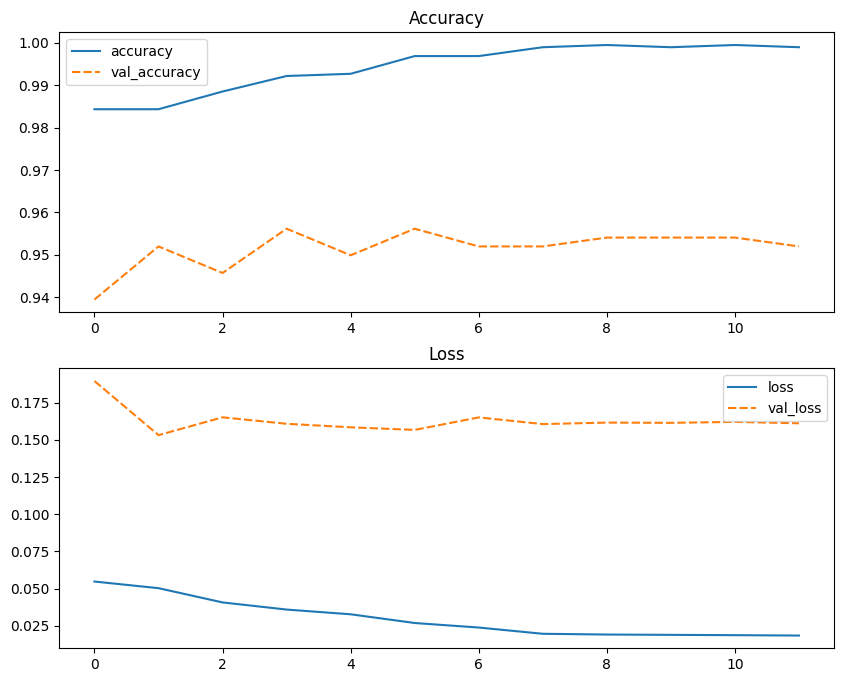

time: 9min 26s (started: 2024-04-10 17:30:37 +00:00)


In [ ]:
# A function for entire training process for pretrained CNN model
# pretrainedCNN(apply augmentation, apply super resolution, type of base model, preprocessing function, finetuning, apply class_weight)

pretrainedCNN(augmentation=True, sr=False,
              base_model=ResNet50, preprocess=resnet50_preprocess,
              finetune=False, class_weight=False)._main()

#### Training with different preprocessing

Trial 10 Complete [00h 04m 32s]
val_loss: 0.28803324699401855

Best val_loss So Far: 0.13731415569782257
Total elapsed time: 00h 53m 35s
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)       

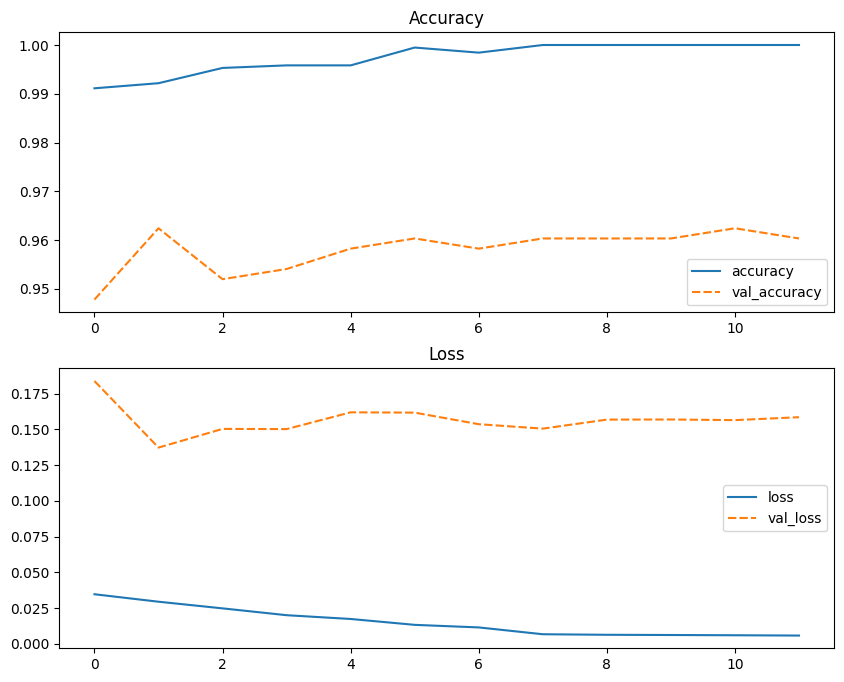

time: 32min 35s (started: 2024-04-05 01:04:14 +00:00)


In [ ]:
# A function for entire training process for pretrained CNN model
# pretrainedCNN(apply augmentation, apply super resolution, type of base model, preprocessing function, finetuning, apply class_weight)

pretrainedCNN(augmentation=False, sr=False,
              base_model=ResNet50, preprocess=resnet50_preprocess,
              finetune=False, class_weight=False)._main()

Trial 5 Complete [00h 02m 53s]
val_loss: 0.3382800817489624

Best val_loss So Far: 0.14753207564353943
Total elapsed time: 00h 15m 48s
Best Hyperparameters: {'optimizer': 'sgd', 'learning_rate': 0.1, 'weight_decay': 0.001}
Model saved to drive/My Drive/Colab Notebooks/Computer Vision/Project/CW_Folder_PG/Models/Pretrained-CNN/20240405-100709.h5
Epoch 1/200
60/60 [==============================] - ETA: 0s - loss: 0.0267 - accuracy: 0.9911
Epoch 1: val_loss improved from inf to 0.13228, saving model to drive/My Drive/Colab Notebooks/Computer Vision/Project/CW_Folder_PG/Models/Pretrained-CNN/20240405-100709.h5
60/60 [==============================] - 43s 399ms/step - loss: 0.0267 - accuracy: 0.9911 - val_loss: 0.1323 - val_accuracy: 0.9666 - lr: 0.1000
Epoch 2/200
60/60 [==============================] - ETA: 0s - loss: 0.0182 - accuracy: 0.9943
Epoch 2: val_loss did not improve from 0.13228
60/60 [==============================] - 22s 370ms/step - loss: 0.0182 - accuracy: 0.9943 - val_lo

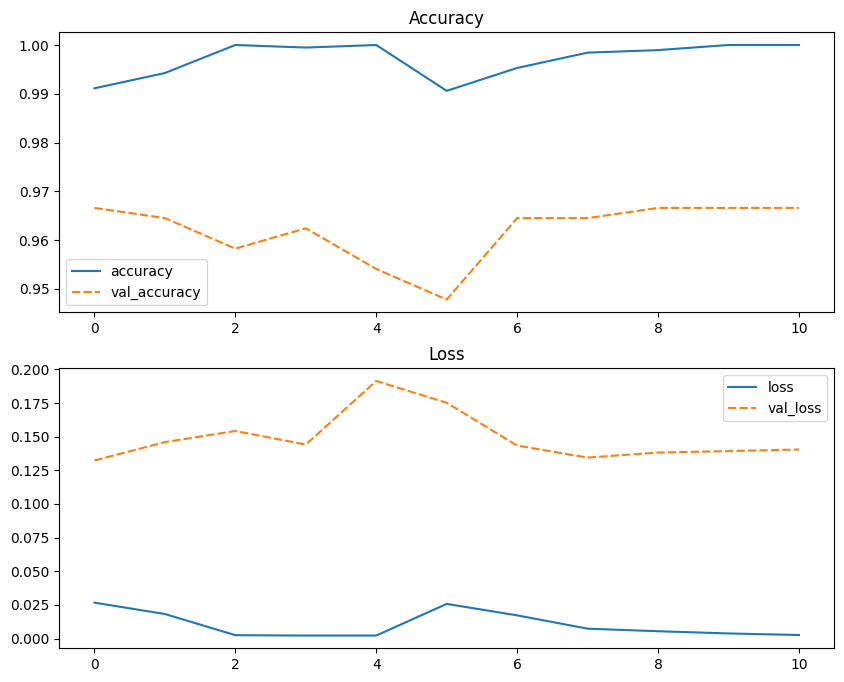

time: 20min 50s (started: 2024-04-05 09:51:09 +00:00)


In [ ]:
# A function for entire training process for pretrained CNN model
# pretrainedCNN(apply augmentation, apply super resolution, type of base model, preprocessing function, finetuning, apply class_weight)

pretrainedCNN(augmentation=False, sr=False,
              base_model=ResNet50, preprocess=resnet50_preprocess,
              finetune=True, class_weight=False)._main()

Reloading Tuner from tmp/pretrainedCNN/tuner0.json
Model saved to drive/My Drive/Colab Notebooks/Computer Vision/Project/CW_Folder_PG/Models/Pretrained-CNN/20240405-101638.h5
Best Hyperparameters: {'optimizer': 'sgd', 'learning_rate': 0.1, 'weight_decay': 0.001}
Model saved to drive/My Drive/Colab Notebooks/Computer Vision/Project/CW_Folder_PG/Models/Pretrained-CNN/20240405-101644.h5
Epoch 1/200
60/60 [==============================] - ETA: 0s - loss: 0.2243 - accuracy: 0.9514
Epoch 1: val_loss improved from inf to 0.10898, saving model to drive/My Drive/Colab Notebooks/Computer Vision/Project/CW_Folder_PG/Models/Pretrained-CNN/20240405-101644.h5
60/60 [==============================] - 13s 170ms/step - loss: 0.2243 - accuracy: 0.9514 - val_loss: 0.1090 - val_accuracy: 0.9645 - lr: 0.1000
Epoch 2/200
60/60 [==============================] - ETA: 0s - loss: 0.1042 - accuracy: 0.9802
Epoch 2: val_loss improved from 0.10898 to 0.09081, saving model to drive/My Drive/Colab Notebooks/Comput

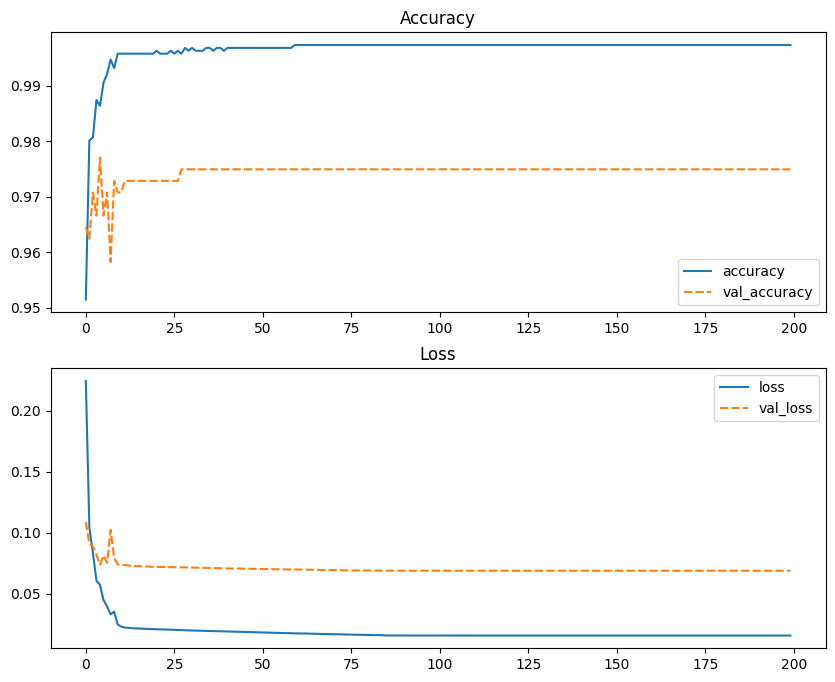

time: 29min 50s (started: 2024-04-05 10:16:36 +00:00)


In [ ]:
# A function for entire training process for pretrained CNN model
# pretrainedCNN(apply augmentation, apply super resolution, type of base model, preprocessing function, finetuning, apply class_weight)

pretrainedCNN(augmentation=False, sr=False,
              base_model=ResNet50, preprocess=resnet50_preprocess,
              finetune=False, class_weight=True)._main()

60/60 [==============================] - 9s 86ms/step
Reloading Tuner from tmp/pretrainedCNN/tuner0.json
Model saved to drive/My Drive/Colab Notebooks/Computer Vision/Project/CW_Folder_PG/Models/Pretrained-CNN/20240405-104653.h5
Best Hyperparameters: {'optimizer': 'sgd', 'learning_rate': 0.1, 'weight_decay': 0.001}
Model saved to drive/My Drive/Colab Notebooks/Computer Vision/Project/CW_Folder_PG/Models/Pretrained-CNN/20240405-104657.h5
Epoch 1/200
60/60 [==============================] - ETA: 0s - loss: 0.6718 - accuracy: 0.8924
Epoch 1: val_loss improved from inf to 0.09317, saving model to drive/My Drive/Colab Notebooks/Computer Vision/Project/CW_Folder_PG/Models/Pretrained-CNN/20240405-104657.h5
60/60 [==============================] - 14s 175ms/step - loss: 0.6718 - accuracy: 0.8924 - val_loss: 0.0932 - val_accuracy: 0.9729 - lr: 0.1000
Epoch 2/200
60/60 [==============================] - ETA: 0s - loss: 0.2985 - accuracy: 0.9227
Epoch 2: val_loss improved from 0.09317 to 0.08453,

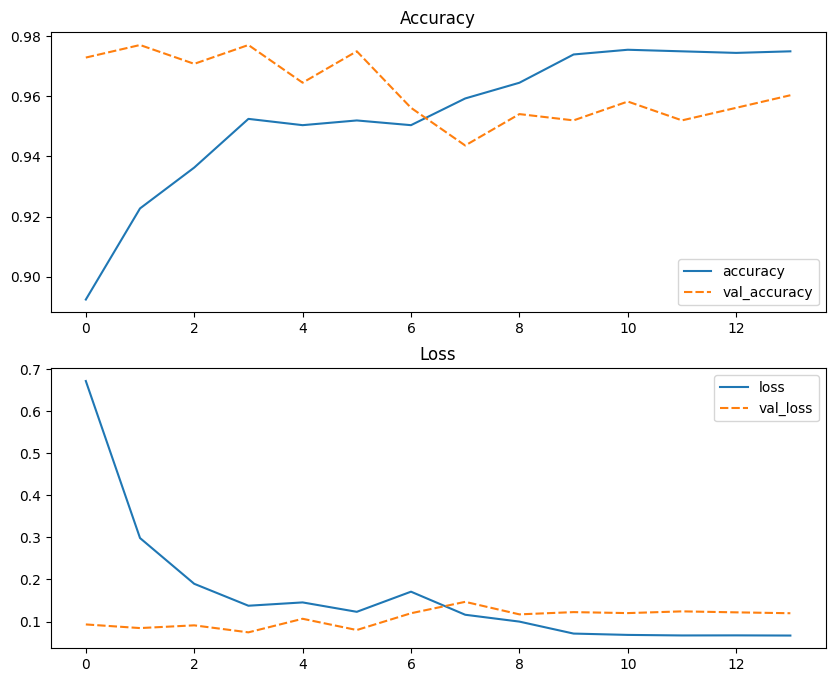

time: 3min 14s (started: 2024-04-05 10:46:26 +00:00)


In [ ]:
# A function for entire training process for pretrained CNN model
# pretrainedCNN(apply augmentation, apply super resolution, type of base model, preprocessing function, finetuning, apply class_weight)

pretrainedCNN(augmentation=False, sr=True,
              base_model=ResNet50, preprocess=resnet50_preprocess,
              finetune=False, class_weight=False)._main()

Reloading Tuner from tmp/pretrainedCNN/tuner0.json
Model saved to drive/My Drive/Colab Notebooks/Computer Vision/Project/CW_Folder_PG/Models/Pretrained-CNN/20240405-145018.h5
Best Hyperparameters: {'optimizer': 'rmsprop', 'learning_rate': 1e-05, 'weight_decay': 0.1}
Model saved to drive/My Drive/Colab Notebooks/Computer Vision/Project/CW_Folder_PG/Models/Pretrained-CNN/20240405-145022.h5
Epoch 1/200
60/60 [==============================] - ETA: 0s - loss: 0.3823 - accuracy: 0.9749
Epoch 1: val_loss improved from inf to 0.17392, saving model to drive/My Drive/Colab Notebooks/Computer Vision/Project/CW_Folder_PG/Models/Pretrained-CNN/20240405-145022.h5
60/60 [==============================] - 48s 432ms/step - loss: 0.3823 - accuracy: 0.9749 - val_loss: 0.1739 - val_accuracy: 0.9645 - lr: 1.0000e-05
Epoch 2/200
60/60 [==============================] - ETA: 0s - loss: 0.1123 - accuracy: 0.9859
Epoch 2: val_loss improved from 0.17392 to 0.13664, saving model to drive/My Drive/Colab Notebook

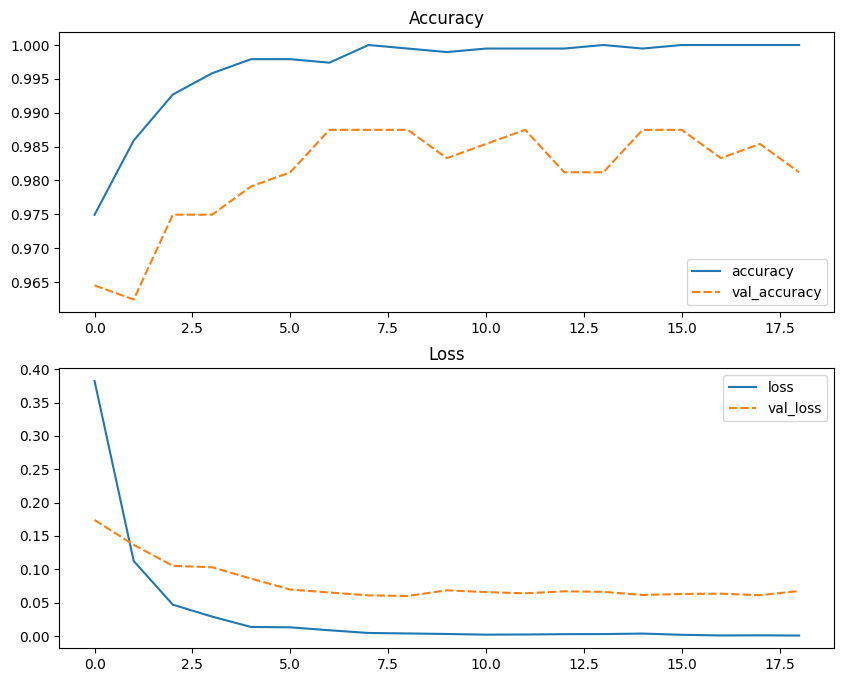

time: 8min 55s (started: 2024-04-05 14:49:49 +00:00)


In [ ]:
# A function for entire training process for pretrained CNN model
# pretrainedCNN(apply augmentation, apply super resolution, type of base model, preprocessing function, finetuning, apply class_weight)

pretrainedCNN(augmentation=True, sr=False,
              base_model=ResNet50, preprocess=resnet50_preprocess,
              finetune=True, class_weight=True)._main()

Reloading Tuner from tmp/pretrainedCNN/tuner0.json
Model saved to drive/My Drive/Colab Notebooks/Computer Vision/Project/CW_Folder_PG/Models/Pretrained-CNN/20240405-145847.h5
Best Hyperparameters: {'optimizer': 'rmsprop', 'learning_rate': 1e-05, 'weight_decay': 0.1}
Model saved to drive/My Drive/Colab Notebooks/Computer Vision/Project/CW_Folder_PG/Models/Pretrained-CNN/20240405-145850.h5
Epoch 1/200
60/60 [==============================] - ETA: 0s - loss: 0.4255 - accuracy: 0.9708
Epoch 1: val_loss improved from inf to 0.12724, saving model to drive/My Drive/Colab Notebooks/Computer Vision/Project/CW_Folder_PG/Models/Pretrained-CNN/20240405-145850.h5
60/60 [==============================] - 46s 407ms/step - loss: 0.4255 - accuracy: 0.9708 - val_loss: 0.1272 - val_accuracy: 0.9603 - lr: 1.0000e-05
Epoch 2/200
60/60 [==============================] - ETA: 0s - loss: 0.1363 - accuracy: 0.9859
Epoch 2: val_loss improved from 0.12724 to 0.11478, saving model to drive/My Drive/Colab Notebook

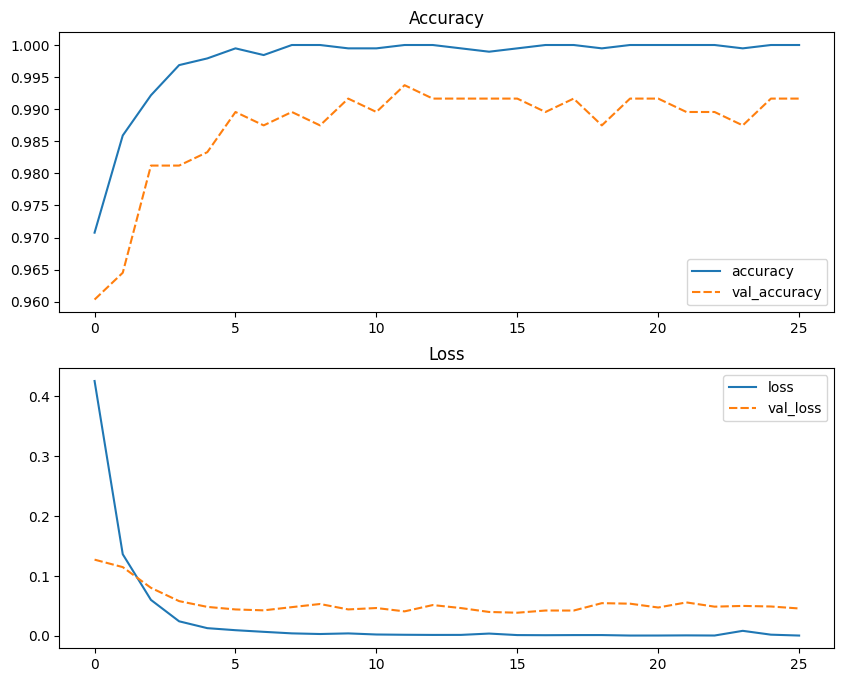

time: 12min 5s (started: 2024-04-05 14:58:44 +00:00)


In [ ]:
# A function for entire training process for pretrained CNN model
# pretrainedCNN(apply augmentation, apply super resolution, type of base model, preprocessing function, finetuning, apply class_weight)

pretrainedCNN(augmentation=False, sr=False,
              base_model=ResNet50, preprocess=resnet50_preprocess,
              finetune=True, class_weight=True)._main()

Reloading Tuner from tmp/pretrainedCNN/tuner0.json
Model saved to drive/My Drive/Colab Notebooks/Computer Vision/Project/CW_Folder_PG/Models/Pretrained-CNN/20240405-151132.h5
Best Hyperparameters: {'optimizer': 'rmsprop', 'learning_rate': 1e-05, 'weight_decay': 0.1}
Model saved to drive/My Drive/Colab Notebooks/Computer Vision/Project/CW_Folder_PG/Models/Pretrained-CNN/20240405-151135.h5
Epoch 1/200
60/60 [==============================] - ETA: 0s - loss: 0.0800 - accuracy: 0.9765
Epoch 1: val_loss improved from inf to 0.13629, saving model to drive/My Drive/Colab Notebooks/Computer Vision/Project/CW_Folder_PG/Models/Pretrained-CNN/20240405-151135.h5
60/60 [==============================] - 47s 410ms/step - loss: 0.0800 - accuracy: 0.9765 - val_loss: 0.1363 - val_accuracy: 0.9499 - lr: 1.0000e-05
Epoch 2/200
60/60 [==============================] - ETA: 0s - loss: 0.0394 - accuracy: 0.9906
Epoch 2: val_loss improved from 0.13629 to 0.10042, saving model to drive/My Drive/Colab Notebook

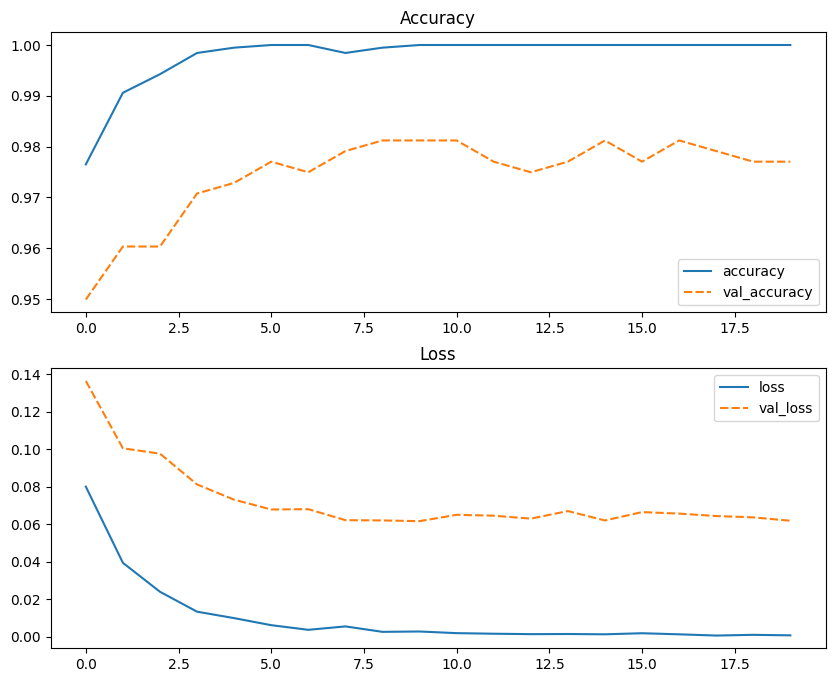

time: 10min 27s (started: 2024-04-05 15:11:05 +00:00)


In [ ]:
# A function for entire training process for pretrained CNN model
# pretrainedCNN(apply augmentation, apply super resolution, type of base model, preprocessing function, finetuning, apply class_weight)

pretrainedCNN(augmentation=True, sr=False,
              base_model=ResNet50, preprocess=resnet50_preprocess,
              finetune=True, class_weight=False)._main()

### **CNN - MobileNet**

> Based on experimentation, MobilNet with augmentation demonstrates the highest accuracy among other the application of data preprocessing

Reloading Tuner from tmp/pretrainedCNN/tuner0.json
Model saved to drive/My Drive/Colab Notebooks/Computer Vision/Project/CW_Folder_PG/Models/Pretrained-CNN/20240405-093229.h5
Best Hyperparameters: {'optimizer': 'sgd', 'learning_rate': 0.1, 'weight_decay': 0.001}
Model saved to drive/My Drive/Colab Notebooks/Computer Vision/Project/CW_Folder_PG/Models/Pretrained-CNN/20240405-093232.h5
Epoch 1/200
60/60 [==============================] - ETA: 0s - loss: 1.0668 - accuracy: 0.8804
Epoch 1: val_loss improved from inf to 0.53873, saving model to drive/My Drive/Colab Notebooks/Computer Vision/Project/CW_Folder_PG/Models/Pretrained-CNN/20240405-093232.h5
60/60 [==============================] - 14s 118ms/step - loss: 1.0668 - accuracy: 0.8804 - val_loss: 0.5387 - val_accuracy: 0.9061 - lr: 0.1000
Epoch 2/200
59/60 [============================>.] - ETA: 0s - loss: 0.4890 - accuracy: 0.9174
Epoch 2: val_loss improved from 0.53873 to 0.45062, saving model to drive/My Drive/Colab Notebooks/Comput

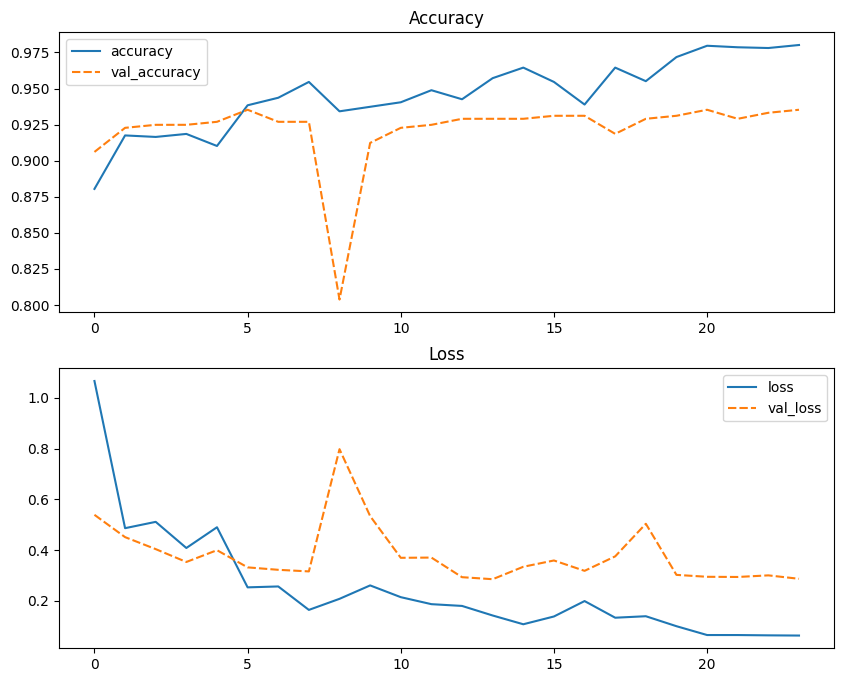

In [ ]:
# A function for entire training process for pretrained CNN model
# pretrainedCNN(apply augmentation, apply super resolution, type of base model, preprocessing function, finetuning, apply class_weight)

pretrainedCNN(augmentation=True, sr=False,
              base_model=MobileNetV2, preprocess=mobilenet_preprocess,
              finetune=False, class_weight=False)._main()

#### Training with different preprocessing

Reloading Tuner from tmp/pretrainedCNN/tuner0.json
Model saved to drive/My Drive/Colab Notebooks/Computer Vision/Project/CW_Folder_PG/Models/Pretrained-CNN/20240405-092608.h5
Best Hyperparameters: {'optimizer': 'sgd', 'learning_rate': 0.1, 'weight_decay': 0.001}
Model saved to drive/My Drive/Colab Notebooks/Computer Vision/Project/CW_Folder_PG/Models/Pretrained-CNN/20240405-092610.h5
Epoch 1/200
60/60 [==============================] - ETA: 0s - loss: 0.8348 - accuracy: 0.8877
Epoch 1: val_loss improved from inf to 0.41522, saving model to drive/My Drive/Colab Notebooks/Computer Vision/Project/CW_Folder_PG/Models/Pretrained-CNN/20240405-092610.h5
60/60 [==============================] - 9s 102ms/step - loss: 0.8348 - accuracy: 0.8877 - val_loss: 0.4152 - val_accuracy: 0.9144 - lr: 0.1000
Epoch 2/200
59/60 [============================>.] - ETA: 0s - loss: 0.6062 - accuracy: 0.9089
Epoch 2: val_loss did not improve from 0.41522
60/60 [==============================] - 3s 56ms/step - los

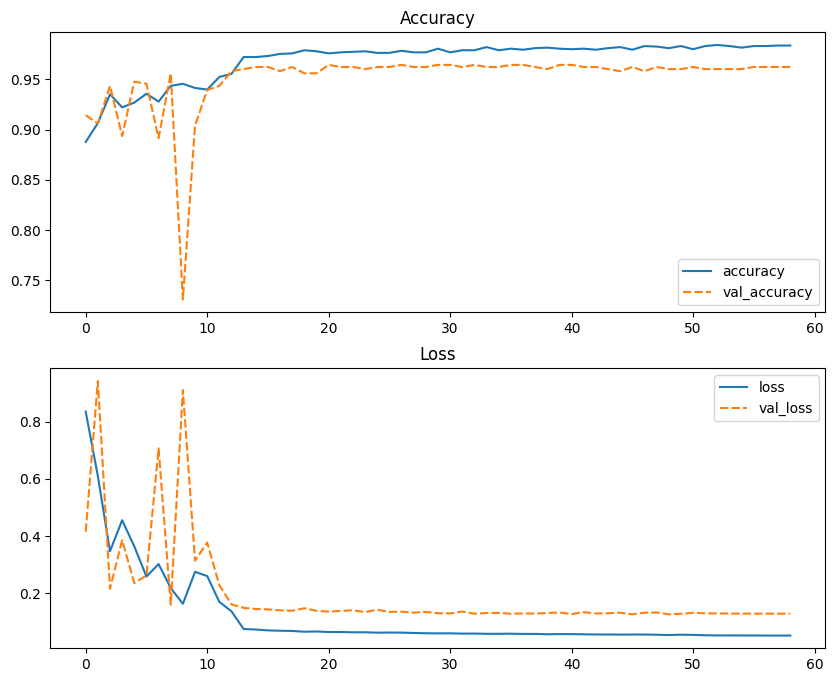

In [ ]:
# A function for entire training process for pretrained CNN model
# pretrainedCNN(apply augmentation, apply super resolution, type of base model, preprocessing function, finetuning, apply class_weight)

pretrainedCNN(augmentation=False, sr=False,
              base_model=MobileNetV2, preprocess=mobilenet_preprocess,
              finetune=False, class_weight=False)._main()

Reloading Tuner from tmp/pretrainedCNN/tuner0.json
Model saved to drive/My Drive/Colab Notebooks/Computer Vision/Project/CW_Folder_PG/Models/Pretrained-CNN/20240405-092226.h5
Best Hyperparameters: {'optimizer': 'sgd', 'learning_rate': 0.1, 'weight_decay': 0.001}
Model saved to drive/My Drive/Colab Notebooks/Computer Vision/Project/CW_Folder_PG/Models/Pretrained-CNN/20240405-092229.h5
Epoch 1/200
60/60 [==============================] - ETA: 0s - loss: 0.0363 - accuracy: 0.9890
Epoch 1: val_loss improved from inf to 0.74282, saving model to drive/My Drive/Colab Notebooks/Computer Vision/Project/CW_Folder_PG/Models/Pretrained-CNN/20240405-092229.h5
60/60 [==============================] - 35s 235ms/step - loss: 0.0363 - accuracy: 0.9890 - val_loss: 0.7428 - val_accuracy: 0.8518 - lr: 0.1000
Epoch 2/200
60/60 [==============================] - ETA: 0s - loss: 0.0083 - accuracy: 0.9990
Epoch 2: val_loss did not improve from 0.74282
60/60 [==============================] - 8s 141ms/step - l

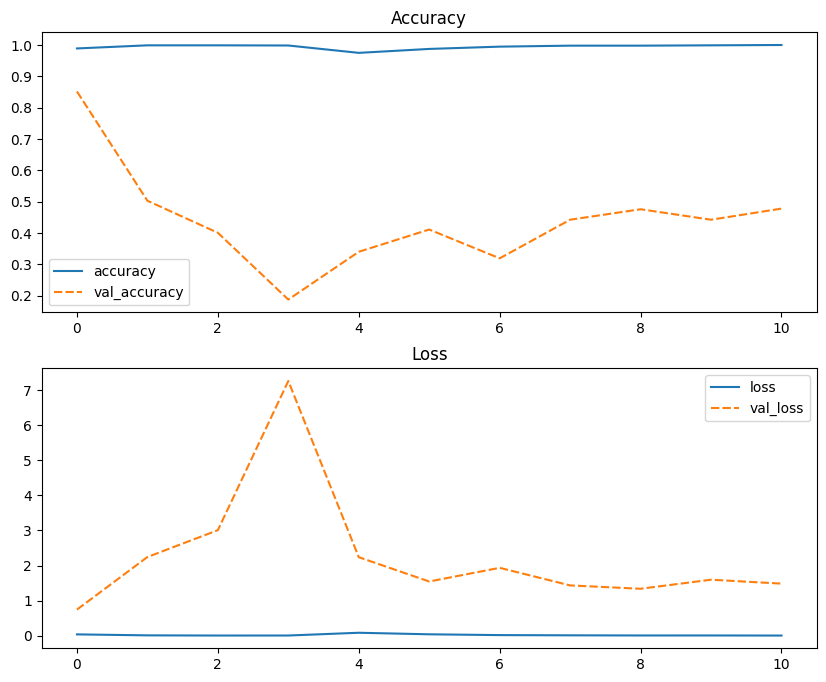

time: 2min 48s (started: 2024-04-05 09:22:24 +00:00)


In [ ]:
# A function for entire training process for pretrained CNN model
# pretrainedCNN(apply augmentation, apply super resolution, type of base model, preprocessing function, finetuning, apply class_weight)

pretrainedCNN(augmentation=False, sr=False,
              base_model=MobileNetV2, preprocess=mobilenet_preprocess,
              finetune=True, class_weight=False)._main()

time: 2min 22s (started: 2024-04-05 09:31:58 +00:00)
Reloading Tuner from tmp/pretrainedCNN/tuner0.json
Model saved to drive/My Drive/Colab Notebooks/Computer Vision/Project/CW_Folder_PG/Models/Pretrained-CNN/20240405-093423.h5
Best Hyperparameters: {'optimizer': 'sgd', 'learning_rate': 0.1, 'weight_decay': 0.001}
Model saved to drive/My Drive/Colab Notebooks/Computer Vision/Project/CW_Folder_PG/Models/Pretrained-CNN/20240405-093427.h5
Epoch 1/200
59/60 [============================>.] - ETA: 0s - loss: 7.9750 - accuracy: 0.6864
Epoch 1: val_loss improved from inf to 0.82830, saving model to drive/My Drive/Colab Notebooks/Computer Vision/Project/CW_Folder_PG/Models/Pretrained-CNN/20240405-093427.h5
60/60 [==============================] - 10s 113ms/step - loss: 7.8626 - accuracy: 0.6909 - val_loss: 0.8283 - val_accuracy: 0.9186 - lr: 0.1000
Epoch 2/200
60/60 [==============================] - ETA: 0s - loss: 4.6414 - accuracy: 0.7603
Epoch 2: val_loss did not improve from 0.82830
60/60

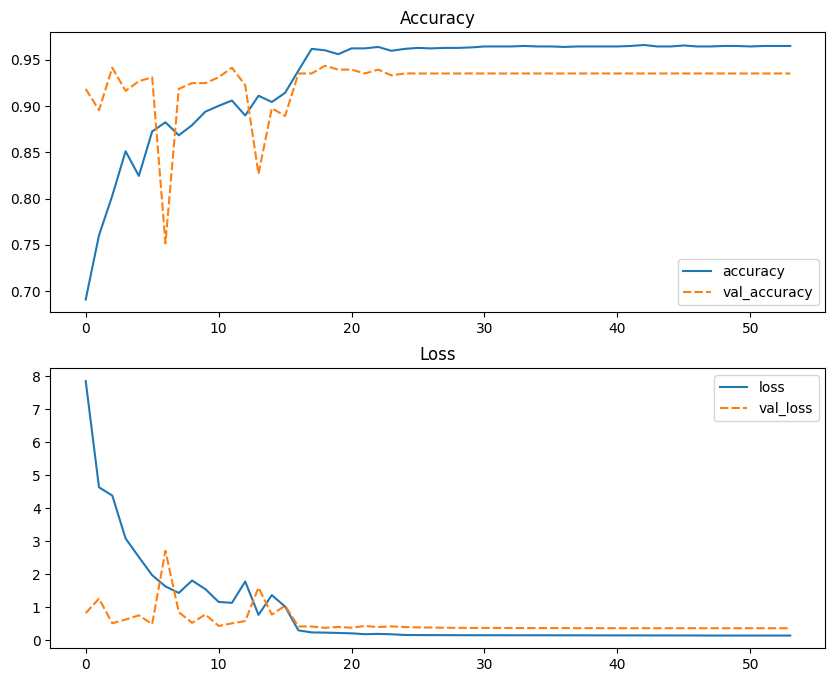

time: 3min 49s (started: 2024-04-05 09:34:21 +00:00)


In [ ]:
# A function for entire training process for pretrained CNN model
# pretrainedCNN(apply augmentation, apply super resolution, type of base model, preprocessing function, finetuning, apply class_weight)

pretrainedCNN(augmentation=False, sr=False,
              base_model=MobileNetV2, preprocess=mobilenet_preprocess,
              finetune=False, class_weight=True)._main()

60/60 [==============================] - 9s 84ms/step
Reloading Tuner from tmp/pretrainedCNN/tuner0.json
Model saved to drive/My Drive/Colab Notebooks/Computer Vision/Project/CW_Folder_PG/Models/Pretrained-CNN/20240405-093834.h5
Best Hyperparameters: {'optimizer': 'sgd', 'learning_rate': 0.1, 'weight_decay': 0.001}
Model saved to drive/My Drive/Colab Notebooks/Computer Vision/Project/CW_Folder_PG/Models/Pretrained-CNN/20240405-093837.h5
Epoch 1/200
59/60 [============================>.] - ETA: 0s - loss: 3.5920 - accuracy: 0.8030
Epoch 1: val_loss improved from inf to 0.83191, saving model to drive/My Drive/Colab Notebooks/Computer Vision/Project/CW_Folder_PG/Models/Pretrained-CNN/20240405-093837.h5
60/60 [==============================] - 9s 102ms/step - loss: 3.5468 - accuracy: 0.8042 - val_loss: 0.8319 - val_accuracy: 0.9165 - lr: 0.1000
Epoch 2/200
59/60 [============================>.] - ETA: 0s - loss: 1.3859 - accuracy: 0.8586
Epoch 2: val_loss did not improve from 0.83191
60/60

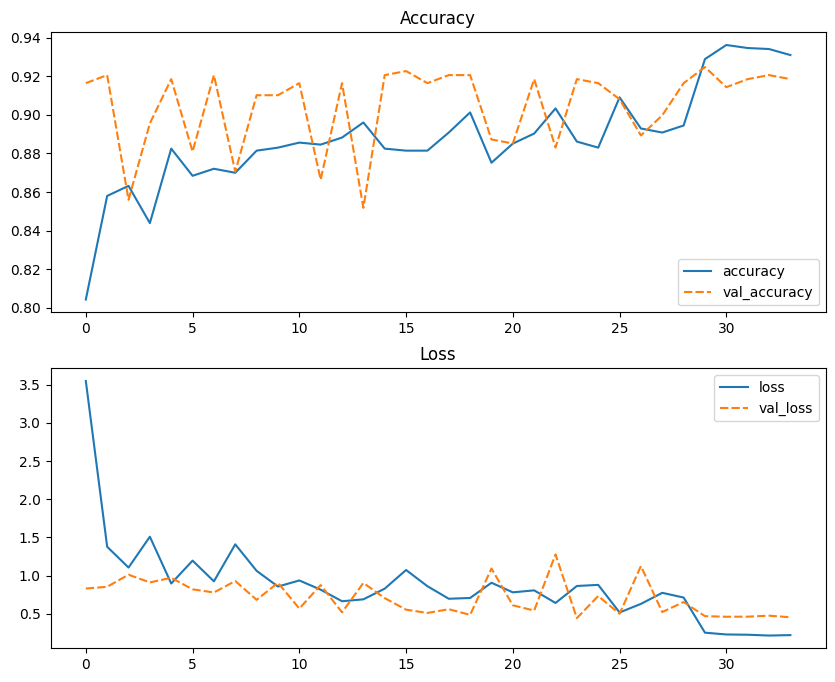

time: 2min 52s (started: 2024-04-05 09:38:18 +00:00)


In [ ]:
# A function for entire training process for pretrained CNN model
# pretrainedCNN(apply augmentation, apply super resolution, type of base model, preprocessing function, finetuning, apply class_weight)

pretrainedCNN(augmentation=False, sr=True,
              base_model=MobileNetV2, preprocess=mobilenet_preprocess,
              finetune=False, class_weight=False)._main()

Reloading Tuner from tmp/pretrainedCNN/tuner0.json
Model saved to drive/My Drive/Colab Notebooks/Computer Vision/Project/CW_Folder_PG/Models/Pretrained-CNN/20240405-094207.h5
Best Hyperparameters: {'optimizer': 'sgd', 'learning_rate': 0.1, 'weight_decay': 0.001}
Model saved to drive/My Drive/Colab Notebooks/Computer Vision/Project/CW_Folder_PG/Models/Pretrained-CNN/20240405-094209.h5
Epoch 1/200
60/60 [==============================] - ETA: 0s - loss: 7.9300 - accuracy: 0.6491
Epoch 1: val_loss improved from inf to 1.53886, saving model to drive/My Drive/Colab Notebooks/Computer Vision/Project/CW_Folder_PG/Models/Pretrained-CNN/20240405-094209.h5
60/60 [==============================] - 9s 90ms/step - loss: 7.9300 - accuracy: 0.6491 - val_loss: 1.5389 - val_accuracy: 0.8309 - lr: 0.1000
Epoch 2/200
59/60 [============================>.] - ETA: 0s - loss: 5.2070 - accuracy: 0.7887
Epoch 2: val_loss improved from 1.53886 to 0.92738, saving model to drive/My Drive/Colab Notebooks/Computer

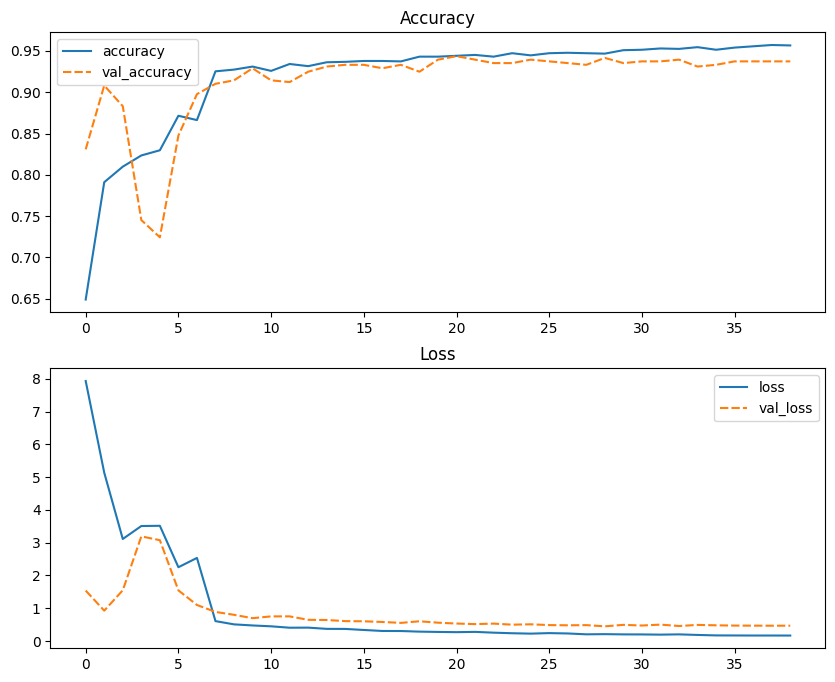

time: 4min 2s (started: 2024-04-05 09:41:40 +00:00)


In [ ]:
# A function for entire training process for pretrained CNN model
# pretrainedCNN(apply augmentation, apply super resolution, type of base model, preprocessing function, finetuning, apply class_weight)

pretrainedCNN(augmentation=True, sr=False,
              base_model=MobileNetV2, preprocess=mobilenet_preprocess,
              finetune=False, class_weight=True)._main()

### **CNN - EfficientNetB0**

> Based on experimentation, EfficientNetB0 with augmentation demonstrates the highest accuracy among other the application of data preprocessing

Trial 5 Complete [00h 00m 52s]
val_loss: 0.32560810446739197

Best val_loss So Far: 0.16097666323184967
Total elapsed time: 00h 05m 16s
Best Hyperparameters: {'optimizer': 'sgd', 'learning_rate': 0.1, 'weight_decay': 0.001}
Model saved to drive/My Drive/Colab Notebooks/CW_Folder_PG/Models/Pretrained-CNN/20240410-170150.h5
Epoch 1/200
60/60 [==============================] - ETA: 0s - loss: 0.1415 - accuracy: 0.9556
Epoch 1: val_loss improved from inf to 0.15148, saving model to drive/My Drive/Colab Notebooks/CW_Folder_PG/Models/Pretrained-CNN/20240410-170150.h5
60/60 [==============================] - 15s 113ms/step - loss: 0.1415 - accuracy: 0.9556 - val_loss: 0.1515 - val_accuracy: 0.9457 - lr: 0.1000
Epoch 2/200
60/60 [==============================] - ETA: 0s - loss: 0.1341 - accuracy: 0.9582
Epoch 2: val_loss did not improve from 0.15148
60/60 [==============================] - 5s 83ms/step - loss: 0.1341 - accuracy: 0.9582 - val_loss: 0.1576 - val_accuracy: 0.9457 - lr: 0.1000
Ep

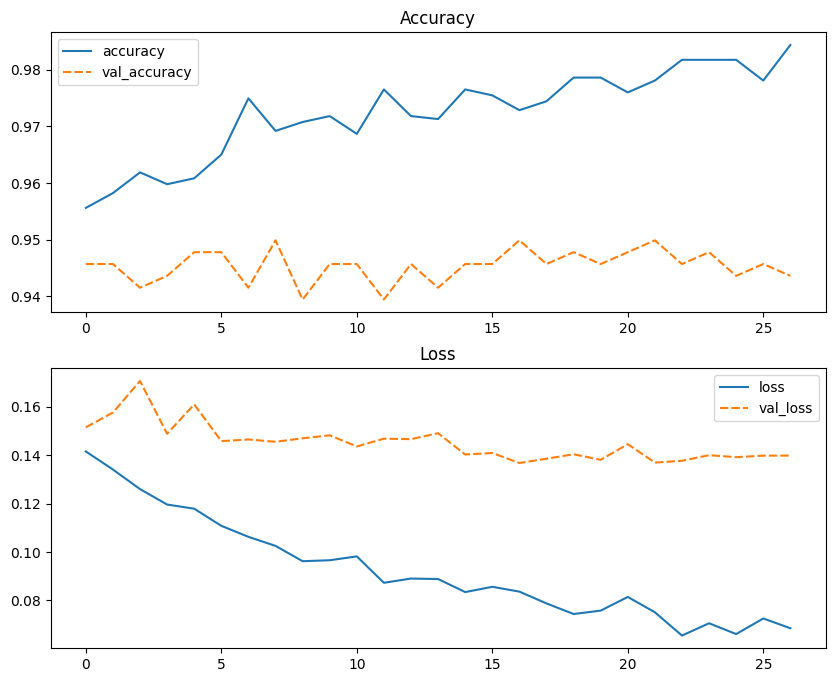

time: 5min 33s (started: 2024-04-10 16:58:56 +00:00)


In [ ]:
# A function for entire training process for pretrained CNN model
# pretrainedCNN(apply augmentation, apply super resolution, type of base model, preprocessing function, finetuning, apply class_weight)

pretrainedCNN(augmentation=True, sr=False,
              base_model=EfficientNetB0, preprocess=efficientnet_preproces,
              finetune=False, class_weight=False)._main()

#### Training with different preprocessing

Trial 5 Complete [00h 00m 50s]
val_loss: 0.29466649889945984

Best val_loss So Far: 0.15430542826652527
Total elapsed time: 00h 03m 41s
Best Hyperparameters: {'optimizer': 'rmsprop', 'learning_rate': 0.01, 'weight_decay': 0.01}
Model saved to drive/My Drive/Colab Notebooks/Computer Vision/Project/CW_Folder_PG/Models/Pretrained-CNN/20240405-153333.h5
Epoch 1/200
60/60 [==============================] - ETA: 0s - loss: 0.0855 - accuracy: 0.9692
Epoch 1: val_loss improved from inf to 0.21275, saving model to drive/My Drive/Colab Notebooks/Computer Vision/Project/CW_Folder_PG/Models/Pretrained-CNN/20240405-153333.h5
60/60 [==============================] - 13s 122ms/step - loss: 0.0855 - accuracy: 0.9692 - val_loss: 0.2127 - val_accuracy: 0.9415 - lr: 0.0100
Epoch 2/200
59/60 [============================>.] - ETA: 0s - loss: 0.0622 - accuracy: 0.9783
Epoch 2: val_loss improved from 0.21275 to 0.16476, saving model to drive/My Drive/Colab Notebooks/Computer Vision/Project/CW_Folder_PG/Mode

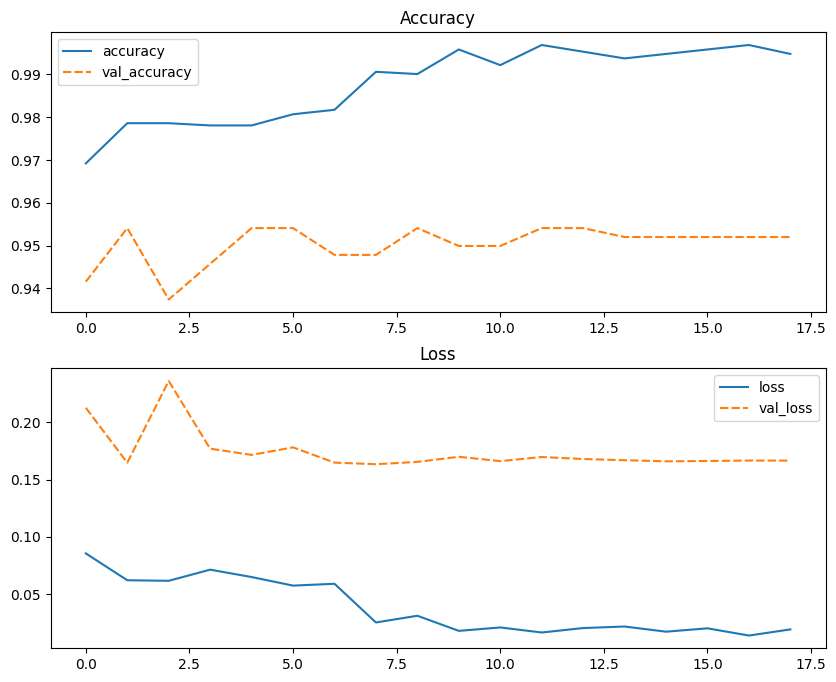

time: 5min 31s (started: 2024-04-05 15:29:43 +00:00)


In [ ]:
# A function for entire training process for pretrained CNN model
# pretrainedCNN(apply augmentation, apply super resolution, type of base model, preprocessing function, finetuning, apply class_weight)

pretrainedCNN(augmentation=False, sr=False,
              base_model=EfficientNetB0, preprocess=efficientnet_preproces,
              finetune=False, class_weight=False)._main()

Reloading Tuner from tmp/pretrainedCNN/tuner0.json
Model saved to drive/My Drive/Colab Notebooks/Computer Vision/Project/CW_Folder_PG/Models/Pretrained-CNN/20240405-153803.h5
Best Hyperparameters: {'optimizer': 'rmsprop', 'learning_rate': 0.01, 'weight_decay': 0.01}
Model saved to drive/My Drive/Colab Notebooks/Computer Vision/Project/CW_Folder_PG/Models/Pretrained-CNN/20240405-153806.h5
Epoch 1/200
60/60 [==============================] - ETA: 0s - loss: 1.6605 - accuracy: 0.7640
Epoch 1: val_loss improved from inf to 11857.80957, saving model to drive/My Drive/Colab Notebooks/Computer Vision/Project/CW_Folder_PG/Models/Pretrained-CNN/20240405-153806.h5
60/60 [==============================] - 43s 317ms/step - loss: 1.6605 - accuracy: 0.7640 - val_loss: 11857.8096 - val_accuracy: 0.8100 - lr: 0.0100
Epoch 2/200
60/60 [==============================] - ETA: 0s - loss: 0.8788 - accuracy: 0.8026
Epoch 2: val_loss improved from 11857.80957 to 3566.17432, saving model to drive/My Drive/Col

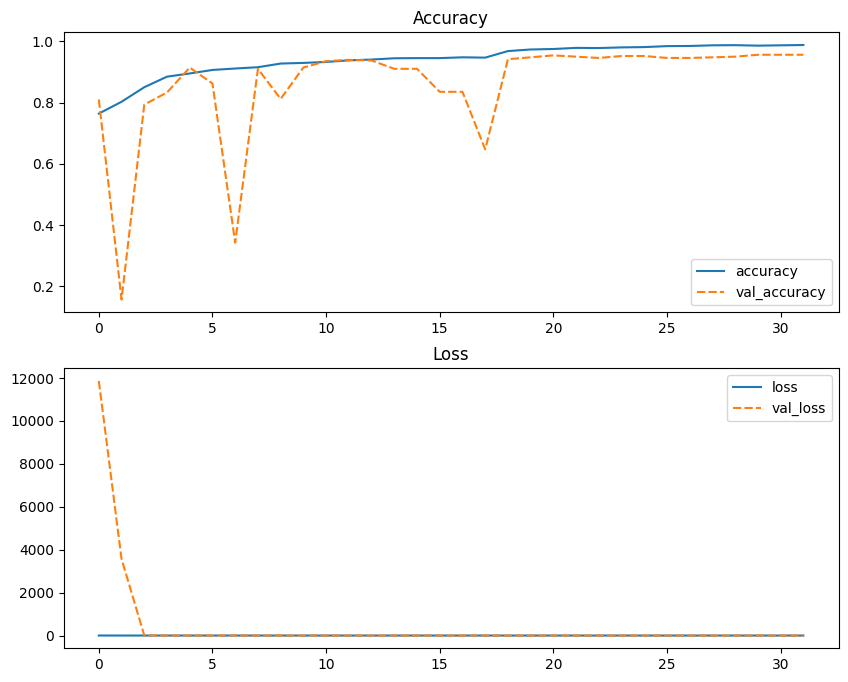

time: 9min 39s (started: 2024-04-05 15:38:01 +00:00)


In [ ]:
# A function for entire training process for pretrained CNN model
# pretrainedCNN(apply augmentation, apply super resolution, type of base model, preprocessing function, finetuning, apply class_weight)

pretrainedCNN(augmentation=False, sr=False,
              base_model=EfficientNetB0, preprocess=efficientnet_preproces,
              finetune=True, class_weight=False)._main()

60/60 [==============================] - 9s 83ms/step
Reloading Tuner from tmp/pretrainedCNN/tuner0.json
Model saved to drive/My Drive/Colab Notebooks/Computer Vision/Project/CW_Folder_PG/Models/Pretrained-CNN/20240405-160152.h5
Best Hyperparameters: {'optimizer': 'rmsprop', 'learning_rate': 0.01, 'weight_decay': 0.01}
Model saved to drive/My Drive/Colab Notebooks/Computer Vision/Project/CW_Folder_PG/Models/Pretrained-CNN/20240405-160156.h5
Epoch 1/200
60/60 [==============================] - ETA: 0s - loss: 1.6369 - accuracy: 0.7791
Epoch 1: val_loss improved from inf to 198.60559, saving model to drive/My Drive/Colab Notebooks/Computer Vision/Project/CW_Folder_PG/Models/Pretrained-CNN/20240405-160156.h5
60/60 [==============================] - 44s 327ms/step - loss: 1.6369 - accuracy: 0.7791 - val_loss: 198.6056 - val_accuracy: 0.8100 - lr: 0.0100
Epoch 2/200
60/60 [==============================] - ETA: 0s - loss: 0.4902 - accuracy: 0.8627
Epoch 2: val_loss improved from 198.60559 t

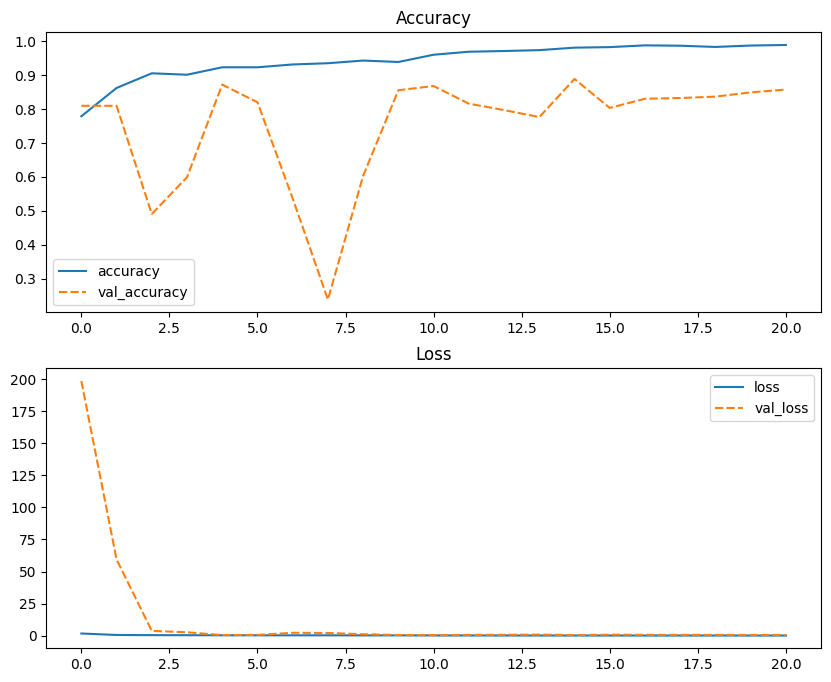

time: 7min 9s (started: 2024-04-05 16:01:40 +00:00)


In [ ]:
# A function for entire training process for pretrained CNN model
# pretrainedCNN(apply augmentation, apply super resolution, type of base model, preprocessing function, finetuning, apply class_weight)

pretrainedCNN(augmentation=False, sr=True,
              base_model=EfficientNetB0, preprocess=efficientnet_preproces,
              finetune=True, class_weight=False)._main()

Reloading Tuner from tmp/pretrainedCNN/tuner0.json
Model saved to drive/My Drive/Colab Notebooks/Computer Vision/Project/CW_Folder_PG/Models/Pretrained-CNN/20240405-155317.h5
Best Hyperparameters: {'optimizer': 'rmsprop', 'learning_rate': 0.01, 'weight_decay': 0.01}
Model saved to drive/My Drive/Colab Notebooks/Computer Vision/Project/CW_Folder_PG/Models/Pretrained-CNN/20240405-155321.h5
Epoch 1/200
60/60 [==============================] - ETA: 0s - loss: 2.0463 - accuracy: 0.7577
Epoch 1: val_loss improved from inf to 217079.37500, saving model to drive/My Drive/Colab Notebooks/Computer Vision/Project/CW_Folder_PG/Models/Pretrained-CNN/20240405-155321.h5
60/60 [==============================] - 44s 314ms/step - loss: 2.0463 - accuracy: 0.7577 - val_loss: 217079.3750 - val_accuracy: 0.8100 - lr: 0.0100
Epoch 2/200
60/60 [==============================] - ETA: 0s - loss: 0.8094 - accuracy: 0.8193
Epoch 2: val_loss improved from 217079.37500 to 53.36516, saving model to drive/My Drive/Co

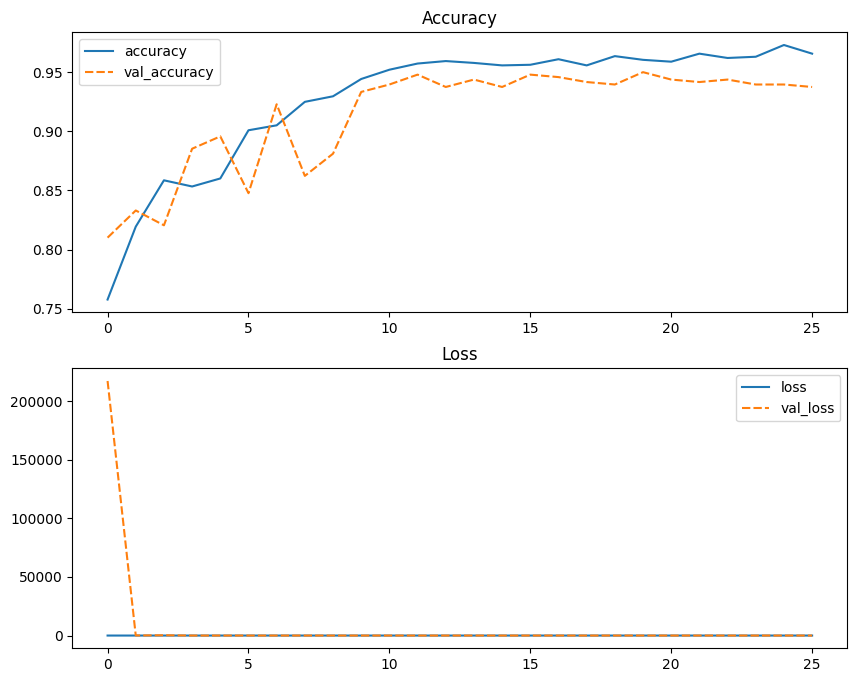

time: 8min 18s (started: 2024-04-05 15:52:53 +00:00)


In [ ]:
# A function for entire training process for pretrained CNN model
# pretrainedCNN(apply augmentation, apply super resolution, type of base model, preprocessing function, finetuning, apply class_weight)

pretrainedCNN(augmentation=True, sr=False,
              base_model=EfficientNetB0, preprocess=efficientnet_preproces,
              finetune=True, class_weight=False)._main()

Reloading Tuner from tmp/pretrainedCNN/tuner0.json
Model saved to drive/My Drive/Colab Notebooks/Computer Vision/Project/CW_Folder_PG/Models/Pretrained-CNN/20240405-154932.h5
Best Hyperparameters: {'optimizer': 'rmsprop', 'learning_rate': 0.01, 'weight_decay': 0.01}
Model saved to drive/My Drive/Colab Notebooks/Computer Vision/Project/CW_Folder_PG/Models/Pretrained-CNN/20240405-154937.h5
Epoch 1/200
60/60 [==============================] - ETA: 0s - loss: 0.3581 - accuracy: 0.8950
Epoch 1: val_loss improved from inf to 0.09844, saving model to drive/My Drive/Colab Notebooks/Computer Vision/Project/CW_Folder_PG/Models/Pretrained-CNN/20240405-154937.h5
60/60 [==============================] - 13s 122ms/step - loss: 0.3581 - accuracy: 0.8950 - val_loss: 0.0984 - val_accuracy: 0.9687 - lr: 0.0100
Epoch 2/200
60/60 [==============================] - ETA: 0s - loss: 0.2068 - accuracy: 0.9279
Epoch 2: val_loss did not improve from 0.09844
60/60 [==============================] - 4s 73ms/step 

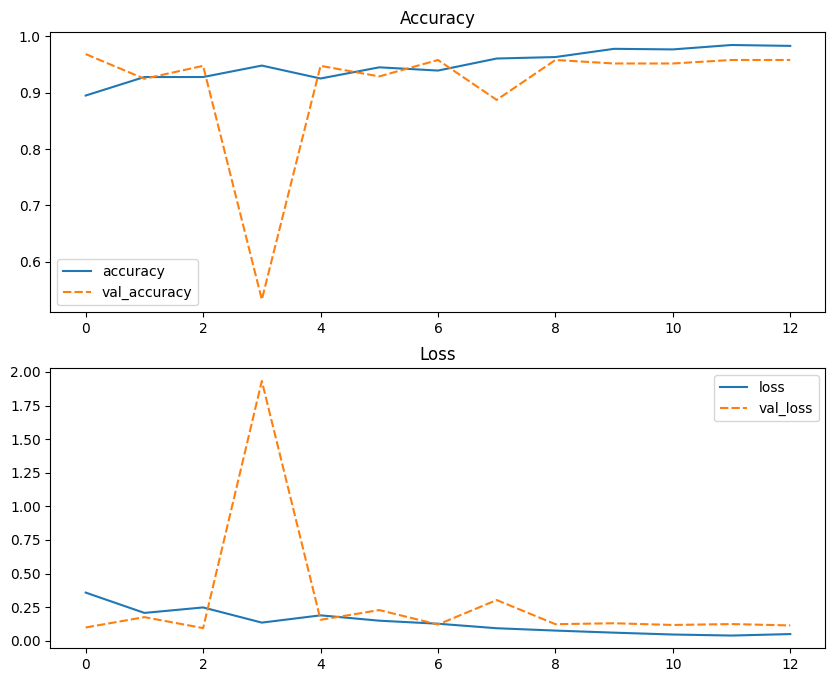

time: 1min 42s (started: 2024-04-05 15:49:31 +00:00)


In [ ]:
# A function for entire training process for pretrained CNN model
# pretrainedCNN(apply augmentation, apply super resolution, type of base model, preprocessing function, finetuning, apply class_weight)

pretrainedCNN(augmentation=False, sr=False,
              base_model=EfficientNetB0, preprocess=efficientnet_preproces,
              finetune=False, class_weight=True)._main()

### **CNN - VGG16**

> Based on experimentation, VGG16 with augmentation demonstrates the highest accuracy among other the application of data preprocessing

Reloading Tuner from tmp/pretrainedCNN/tuner0.json
Model saved to drive/My Drive/Colab Notebooks/Computer Vision/Project/CW_Folder_PG/Models/Pretrained-CNN/20240405-163931.h5
Best Hyperparameters: {'optimizer': 'sgd', 'learning_rate': 0.01, 'weight_decay': 0.01}
Model saved to drive/My Drive/Colab Notebooks/Computer Vision/Project/CW_Folder_PG/Models/Pretrained-CNN/20240405-163933.h5
Epoch 1/200
60/60 [==============================] - ETA: 0s - loss: 0.1747 - accuracy: 0.9410
Epoch 1: val_loss improved from inf to 0.17227, saving model to drive/My Drive/Colab Notebooks/Computer Vision/Project/CW_Folder_PG/Models/Pretrained-CNN/20240405-163933.h5
60/60 [==============================] - 30s 363ms/step - loss: 0.1747 - accuracy: 0.9410 - val_loss: 0.1723 - val_accuracy: 0.9353 - lr: 0.0100
Epoch 2/200
60/60 [==============================] - ETA: 0s - loss: 0.1550 - accuracy: 0.9462
Epoch 2: val_loss improved from 0.17227 to 0.15784, saving model to drive/My Drive/Colab Notebooks/Comput

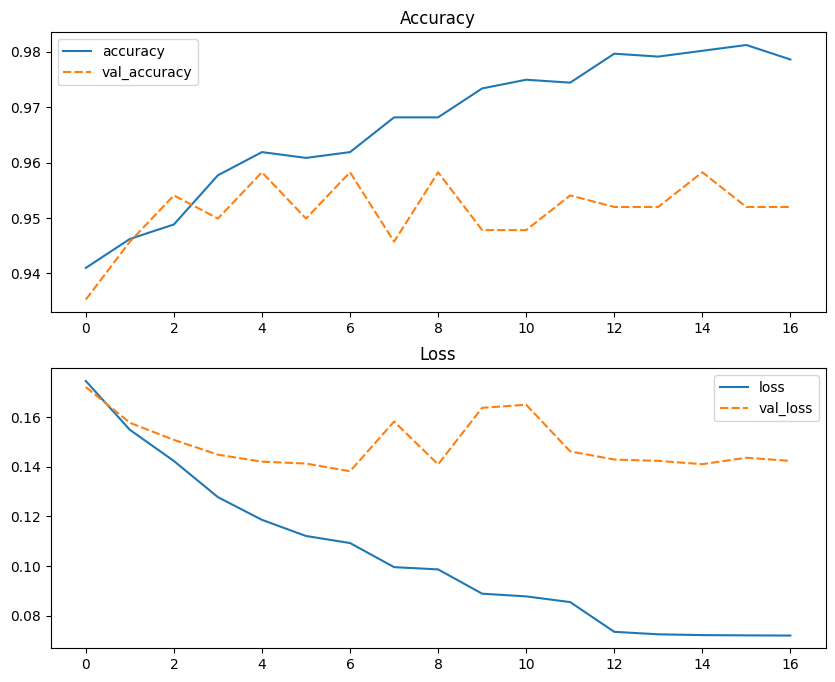

time: 4min 1s (started: 2024-04-05 16:39:02 +00:00)


In [ ]:
# A function for entire training process for pretrained CNN model
# pretrainedCNN(apply augmentation, apply super resolution, type of base model, preprocessing function, finetuning, apply class_weight)

pretrainedCNN(augmentation=True, sr=False,
              base_model=VGG16, preprocess=vgg16_preprocess,
              finetune=False, class_weight=False)._main()

#### Training with different preprocessing

Trial 5 Complete [00h 01m 28s]
val_loss: 0.2716197669506073

Best val_loss So Far: 0.22616128623485565
Total elapsed time: 00h 07m 09s
Best Hyperparameters: {'optimizer': 'sgd', 'learning_rate': 0.01, 'weight_decay': 0.01}
Model saved to drive/My Drive/Colab Notebooks/Computer Vision/Project/CW_Folder_PG/Models/Pretrained-CNN/20240405-162448.h5
Epoch 1/200
60/60 [==============================] - ETA: 0s - loss: 0.1577 - accuracy: 0.9446
Epoch 1: val_loss improved from inf to 0.21048, saving model to drive/My Drive/Colab Notebooks/Computer Vision/Project/CW_Folder_PG/Models/Pretrained-CNN/20240405-162448.h5
60/60 [==============================] - 12s 178ms/step - loss: 0.1577 - accuracy: 0.9446 - val_loss: 0.2105 - val_accuracy: 0.9311 - lr: 0.0100
Epoch 2/200
60/60 [==============================] - ETA: 0s - loss: 0.1382 - accuracy: 0.9535
Epoch 2: val_loss did not improve from 0.21048
60/60 [==============================] - 9s 158ms/step - loss: 0.1382 - accuracy: 0.9535 - val_los

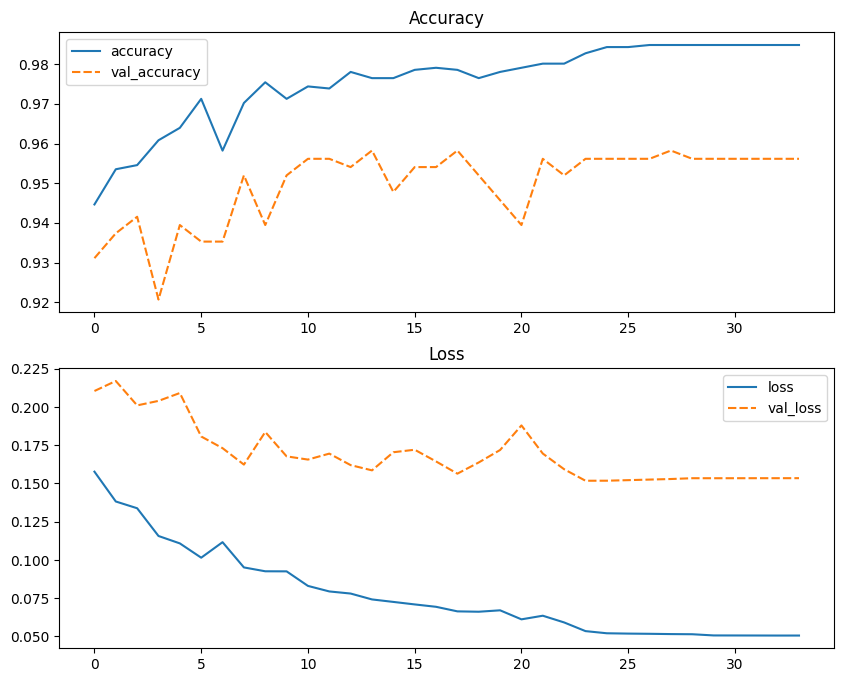

time: 13min 54s (started: 2024-04-05 16:17:34 +00:00)


In [ ]:
# A function for entire training process for pretrained CNN model
# pretrainedCNN(apply augmentation, apply super resolution, type of base model, preprocessing function, finetuning, apply class_weight)

pretrainedCNN(augmentation=False, sr=False,
              base_model=VGG16, preprocess=vgg16_preprocess,
              finetune=False, class_weight=False)._main()

Reloading Tuner from tmp/pretrainedCNN/tuner0.json
Model saved to drive/My Drive/Colab Notebooks/Computer Vision/Project/CW_Folder_PG/Models/Pretrained-CNN/20240405-163151.h5
Best Hyperparameters: {'optimizer': 'sgd', 'learning_rate': 0.01, 'weight_decay': 0.01}
Model saved to drive/My Drive/Colab Notebooks/Computer Vision/Project/CW_Folder_PG/Models/Pretrained-CNN/20240405-163153.h5
Epoch 1/200
60/60 [==============================] - ETA: 0s - loss: nan - accuracy: 0.1916
Epoch 1: val_loss did not improve from inf
60/60 [==============================] - 49s 572ms/step - loss: nan - accuracy: 0.1916 - val_loss: nan - val_accuracy: 0.1566 - lr: 0.0100
Epoch 2/200
60/60 [==============================] - ETA: 0s - loss: nan - accuracy: 0.1572
Epoch 2: val_loss did not improve from inf
60/60 [==============================] - 23s 386ms/step - loss: nan - accuracy: 0.1572 - val_loss: nan - val_accuracy: 0.1566 - lr: 0.0100
Epoch 3/200
60/60 [==============================] - ETA: 0s - lo

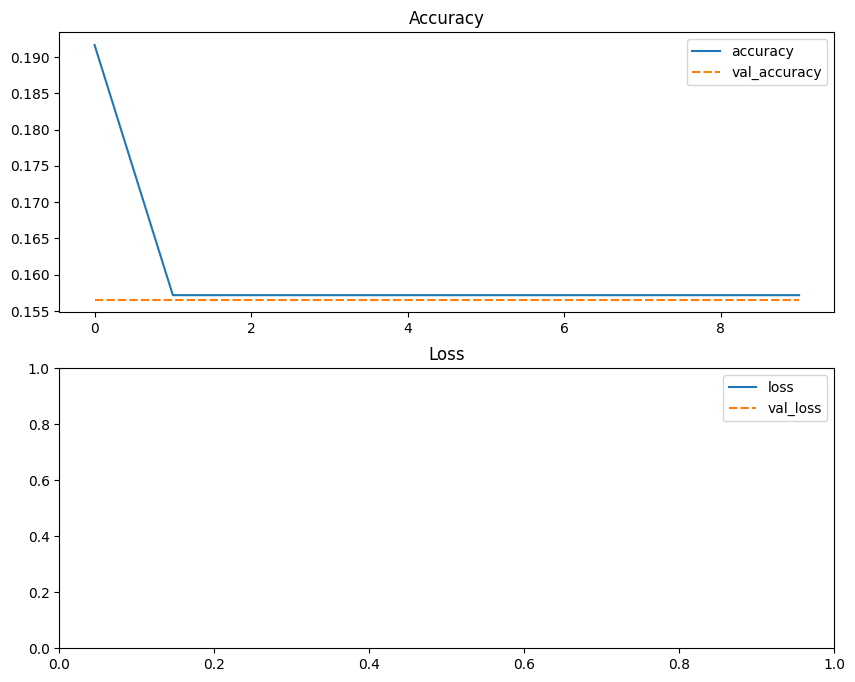

time: 5min 46s (started: 2024-04-05 16:31:48 +00:00)


In [ ]:
# A function for entire training process for pretrained CNN model
# pretrainedCNN(apply augmentation, apply super resolution, type of base model, preprocessing function, finetuning, apply class_weight)

pretrainedCNN(augmentation=False, sr=False,
              base_model=VGG16, preprocess=vgg16_preprocess,
              finetune=True, class_weight=False)._main()

Trial 5 Complete [00h 00m 55s]
val_loss: 2.5017147064208984

Best val_loss So Far: 0.34146299958229065
Total elapsed time: 00h 06m 42s
Best Hyperparameters: {'optimizer': 'sgd', 'learning_rate': 0.001, 'weight_decay': 0.001}
Model saved to drive/My Drive/Colab Notebooks/Computer Vision/Project/CW_Folder_PG/Models/Pretrained-CNN/20240407-184307.h5
Epoch 1/200
60/60 [==============================] - ETA: 0s - loss: 0.5501 - accuracy: 0.8157
Epoch 1: val_loss improved from inf to 0.33361, saving model to drive/My Drive/Colab Notebooks/Computer Vision/Project/CW_Folder_PG/Models/Pretrained-CNN/20240407-184307.h5
60/60 [==============================] - 11s 176ms/step - loss: 0.5501 - accuracy: 0.8157 - val_loss: 0.3336 - val_accuracy: 0.8747 - lr: 0.0010
Epoch 2/200
60/60 [==============================] - ETA: 0s - loss: 0.5237 - accuracy: 0.8266
Epoch 2: val_loss did not improve from 0.33361
60/60 [==============================] - 10s 168ms/step - loss: 0.5237 - accuracy: 0.8266 - val_

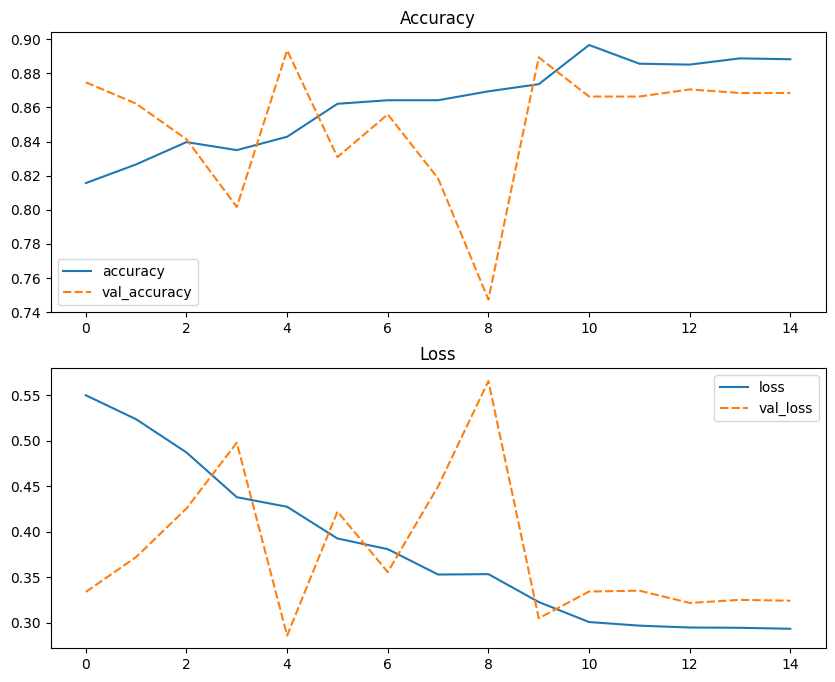

In [ ]:
# A function for entire training process for pretrained CNN model
# pretrainedCNN(apply augmentation, apply super resolution, type of base model, preprocessing function, finetuning, apply class_weight)

pretrainedCNN(augmentation=False, sr=False,
              base_model=VGG16, preprocess=vgg16_preprocess,
              finetune=False, class_weight=True)._main()

time: 10min 33s (started: 2024-04-07 18:36:19 +00:00)
60/60 [==============================] - 9s 82ms/step
Reloading Tuner from tmp/pretrainedCNN/tuner0.json
Model saved to drive/My Drive/Colab Notebooks/Computer Vision/Project/CW_Folder_PG/Models/Pretrained-CNN/20240407-184719.h5
Best Hyperparameters: {'optimizer': 'sgd', 'learning_rate': 0.001, 'weight_decay': 0.001}
Model saved to drive/My Drive/Colab Notebooks/Computer Vision/Project/CW_Folder_PG/Models/Pretrained-CNN/20240407-184720.h5
Epoch 1/200
60/60 [==============================] - ETA: 0s - loss: 0.4916 - accuracy: 0.7984
Epoch 1: val_loss improved from inf to 0.28297, saving model to drive/My Drive/Colab Notebooks/Computer Vision/Project/CW_Folder_PG/Models/Pretrained-CNN/20240407-184720.h5
60/60 [==============================] - 11s 171ms/step - loss: 0.4916 - accuracy: 0.7984 - val_loss: 0.2830 - val_accuracy: 0.9144 - lr: 0.0010
Epoch 2/200
60/60 [==============================] - ETA: 0s - loss: 0.4185 - accuracy: 0.

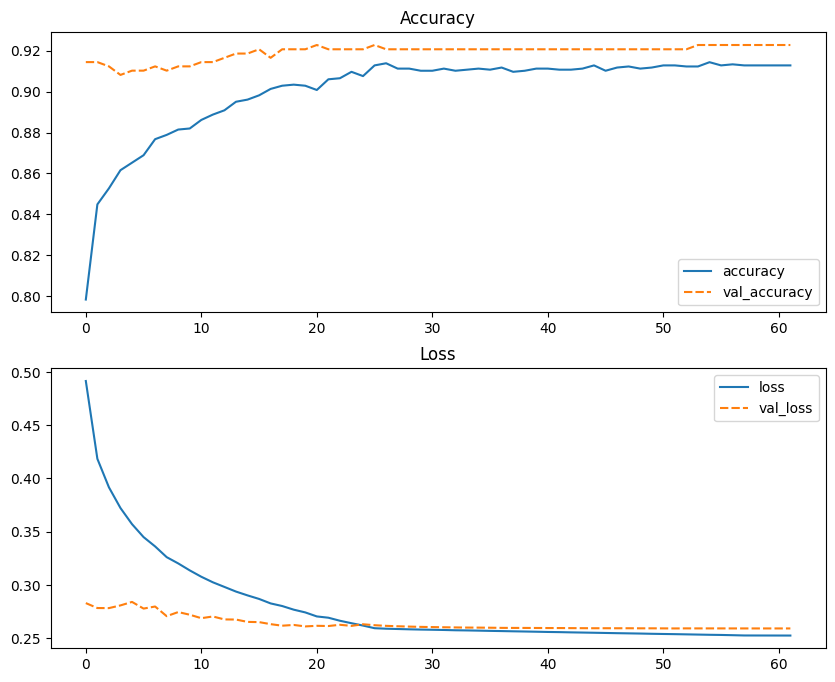

time: 12min 6s (started: 2024-04-07 18:46:52 +00:00)


In [ ]:
# A function for entire training process for pretrained CNN model
# pretrainedCNN(apply augmentation, apply super resolution, type of base model, preprocessing function, finetuning, apply class_weight)

pretrainedCNN(augmentation=False, sr=True,
              base_model=VGG16, preprocess=vgg16_preprocess,
              finetune=False, class_weight=False)._main()